In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# for inline plots in jupyter
%matplotlib inline 

#removing warning messages CHECK THIS IF SOMETHING BREAKS!!!!!
pd.options.mode.chained_assignment = 'warn'  # default='warn'

data_path = "Marketing_Campaign_Train.csv"

data = pd.read_csv(data_path)

In [488]:
#Shape of data.csv we have 1680 rows and 29 columns
print("Shape: ", data.shape)

Shape:  (1680, 29)


In [489]:
data.info() #Seeing names of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

Here we see the types of all the data. As it says in the bottom line there are 64 float types, and 3 ints and objects.

Below this we have the describe function showing important information about the attributes

In [490]:
data.describe()

,ID,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1680.000000,1651.000000,1609.000000,1672.000000,1660.000000,1680.000000,1673.000000,1673.000000,1659.000000,1673.000000,...,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000
mean,5584.735714,1969.047244,51983.554382,0.454545,0.503614,48.890476,303.676031,25.224148,166.232068,35.998207,...,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214
std,3233.716033,11.937421,26567.679664,0.538492,0.544011,29.091872,340.672889,38.754356,227.583935,52.995401,...,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2862.500000,1959.500000,34596.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.500000,2.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5511.000000,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.500000,1978.000000,67716.000000,1.000000,1.000000,74.000000,508.000000,30.000000,223.000000,47.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [491]:
distrib = data.describe(include='all')
distrib.loc["median"] = data.median()
distrib.loc["skewness"] = data.skew()
distrib

C:\Users\obaro\AppData\Local\Temp\ipykernel_34964\885643443.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  distrib.loc["median"] = data.median()
C:\Users\obaro\AppData\Local\Temp\ipykernel_34964\885643443.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  distrib.loc["skewness"] = data.skew()


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1680.000000,1651.000000,1672,1646,1609.000000,1672.000000,1660.000000,1680,1680.000000,1673.000000,...,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000
unique,NaN,NaN,5,6,NaN,NaN,NaN,634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,14/02/2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,830,653,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5584.735714,1969.047244,NaN,NaN,51983.554382,0.454545,0.503614,NaN,48.890476,303.676031,...,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214
std,3233.716033,11.937421,NaN,NaN,26567.679664,0.538492,0.544011,NaN,29.091872,340.672889,...,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2862.500000,1959.500000,NaN,NaN,34596.000000,0.000000,0.000000,NaN,24.000000,23.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5511.000000,1970.000000,NaN,NaN,50611.000000,0.000000,0.000000,NaN,50.000000,167.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.500000,1978.000000,NaN,NaN,67716.000000,1.000000,1.000000,NaN,74.000000,508.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


From the 75% row we see that the majority of people don't respond nor complain on campaigns.

The mean row shows that there is little response to all campaigns.

In [492]:
data.std(numeric_only=True).max() #This is the value of the income as can be seen in the table above

26567.67966434397

This means that there is a large gap between the smallest and largest incomes

ID is unique for each row, revenue and Cost_Contact are the same for each row. therefor we can drop them

In [493]:
data = data.drop(['ID','Revenue','Cost_Contact'], axis=1)

Isolating numerical data

In [494]:
numeric_col = data.describe().columns # to get the numeric column
numeric_data = data[numeric_col] #getting the numeric columns
numeric_data.info() #checking we got the numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1651 non-null   float64
 1   Income                 1609 non-null   float64
 2   Num_of_kids            1672 non-null   float64
 3   Num_of_Teen            1660 non-null   float64
 4   Recency                1680 non-null   int64  
 5   Mnt_Fruits             1673 non-null   float64
 6   Mnt_Meat               1673 non-null   float64
 7   Mnt_sweet              1659 non-null   float64
 8   Mnt_Wines              1673 non-null   float64
 9   Mnt_Gold_Products      1673 non-null   float64
 10  Mnt_Fish               1673 non-null   float64
 11  Num_Web_Purchases      1651 non-null   float64
 12  Num_Store_Purchases    1673 non-null   float64
 13  Num_Deals_Purchases    1673 non-null   float64
 14  Num_Catalog_Purchases  1673 non-null   float64
 15  Num_

In [495]:
nominal_data = data.drop(numeric_col, axis=1) #removing the numeric columns gives us the remaining columns

In [496]:
nominal_data

,Education,Status,Registration_date
0,Graduation,Married,06/01/2013
1,Graduation,Divorced,18/05/2014
2,Graduation,Single,18/09/2012
3,2n Cycle,Together,23/01/2013
4,PhD,Married,04/08/2012
...,...,...,...
1675,PhD,Married,26/08/2012
1676,Master,Together,06/03/2013
1677,PhD,Together,20/07/2013
1678,Graduation,Single,21/03/2014


In [497]:
distrib = numeric_data.describe(include='all')
distrib.loc["median"] = numeric_data.median()
distrib.loc["skewness"] = numeric_data.skew()
distrib

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
count,1651.000000,1609.000000,1672.000000,1660.000000,1680.000000,1673.000000,1673.000000,1659.000000,1673.000000,1673.000000,...,1673.000000,1673.000000,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1680.000000
mean,1969.047244,51983.554382,0.454545,0.503614,48.890476,303.676031,25.224148,166.232068,35.998207,26.200239,...,2.650329,5.736402,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,0.148214
std,11.937421,26567.679664,0.538492,0.544011,29.091872,340.672889,38.754356,227.583935,52.995401,40.894498,...,3.022488,3.225084,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.355418
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.500000,34596.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.500000,2.000000,1.000000,...,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,8.000000,...,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,67716.000000,1.000000,1.000000,74.000000,508.000000,30.000000,223.000000,47.000000,32.000000,...,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,8.000000,...,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skewness,-0.352130,7.916831,0.584131,0.412991,-0.012308,1.182911,2.149518,2.109214,1.988343,2.218833,...,2.065762,0.699794,0.259664,3.191823,3.322458,3.305147,3.527126,8.359327,10.427719,1.981920


In [498]:
for col in numeric_data:
    print(col, ' skew:', numeric_data[col].skew(axis = 0, skipna = True) )

Year_Birth  skew: -0.3521297334201921
Income  skew: 7.916831486203255
Num_of_kids  skew: 0.5841313250351708
Num_of_Teen  skew: 0.4129909449000085
Recency  skew: -0.012307768420328446
Mnt_Fruits  skew: 1.1829109635956956
Mnt_Meat  skew: 2.1495184429670813
Mnt_sweet  skew: 2.1092143754162325
Mnt_Wines  skew: 1.988342728206097
Mnt_Gold_Products  skew: 2.218833414968302
Mnt_Fish  skew: 1.9402486173238092
Num_Web_Purchases  skew: 2.5125546694750898
Num_Store_Purchases  skew: 1.5552728492914274
Num_Deals_Purchases  skew: 2.0657617307381693
Num_Catalog_Purchases  skew: 0.6997937661170338
Num_Web_Visits  skew: 0.25966407514401624
Response_Campaign_1  skew: 3.191823311903448
Response_Campaign_2  skew: 3.3224579772122715
Response_Campaign_3  skew: 3.305146751217529
Response_Campaign_4  skew: 3.5271264290087347
Response_Campaign_5  skew: 8.359327109203887
Complain  skew: 10.427719201596041
Response  skew: 1.9819195359175958


High skew values in Complain, Income, and Response_Campaign_5

The skewness increases with the campaign number. As such, we surmise that future campaigns are less fruitful.

Income also had a high std value. We should normalize the income to smaller numbers

d:\Documents\University\Year_4\2nd Semester\Data mining\datamine\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


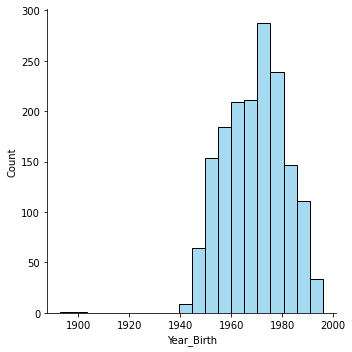

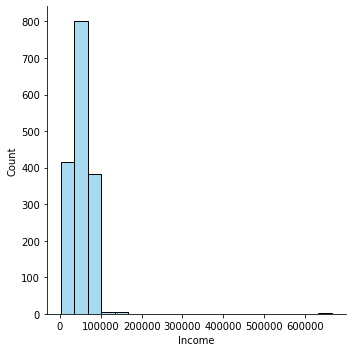

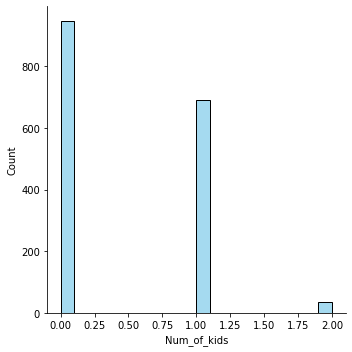

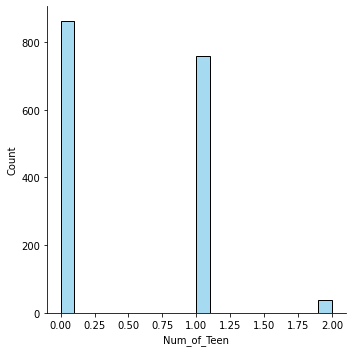

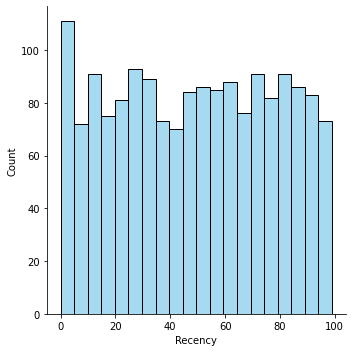

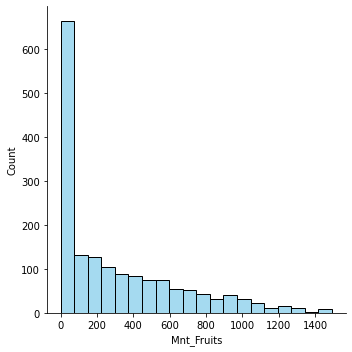

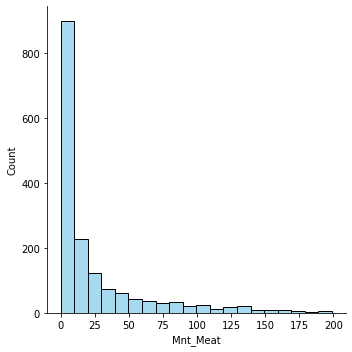

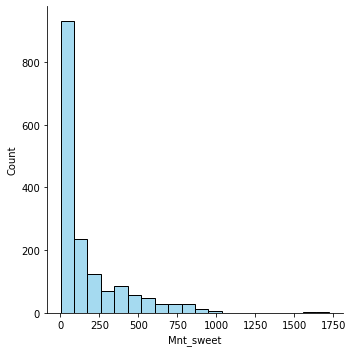

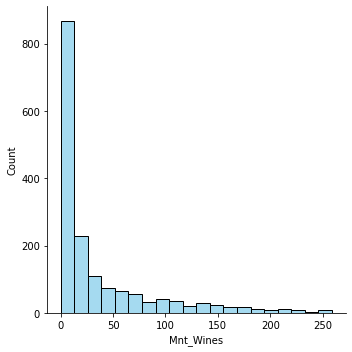

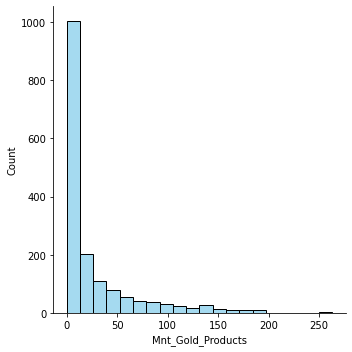

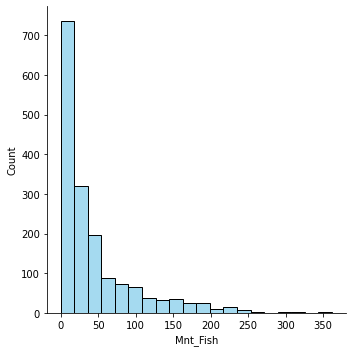

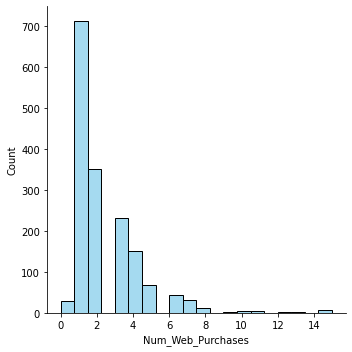

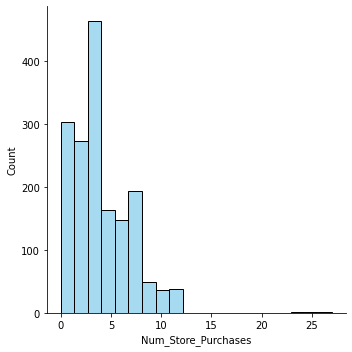

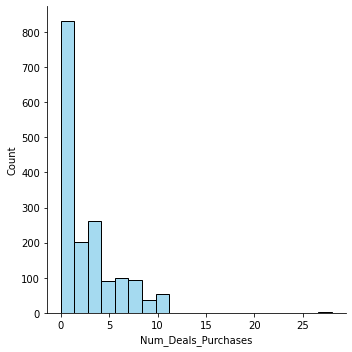

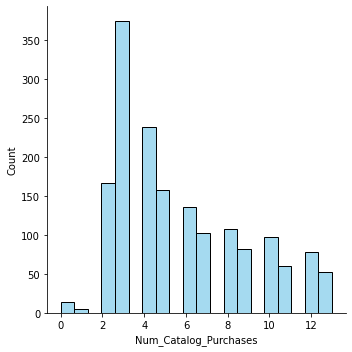

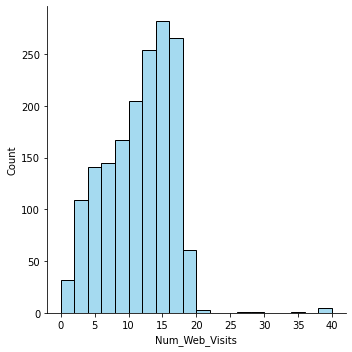

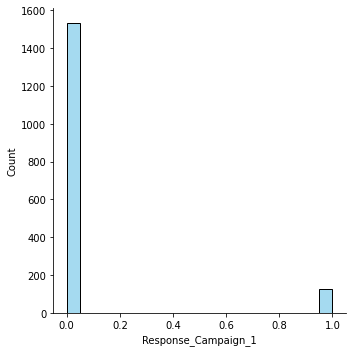

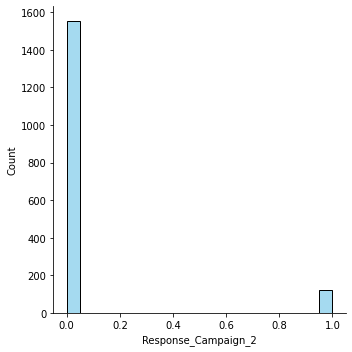

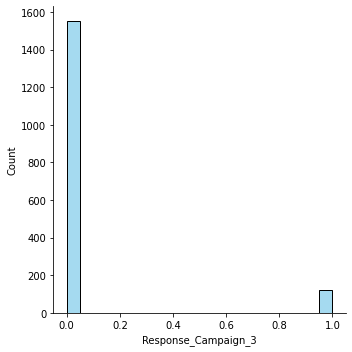

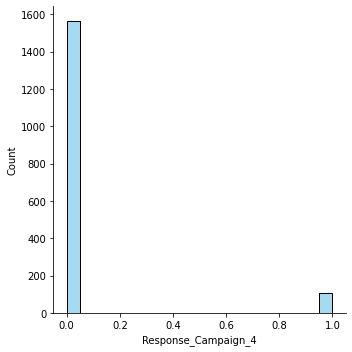

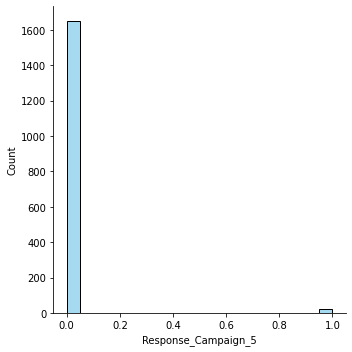

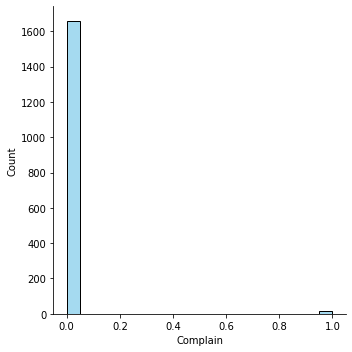

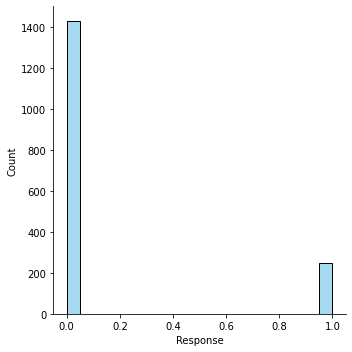

In [499]:
for col in numeric_data:
    sns.displot(numeric_data[col], bins=20, color='skyblue') 

Next, we want to show the correlation between each of the factors to the response rate. (only numeric data)

The correlation with response to campaign 3 is the highest at 0.331.

In [500]:
maxft = ""
maxcr = 0
correlationData = numeric_data.drop(['Response'],axis=1)
for feature in correlationData.keys():
    print(feature,": ")
    cor = numeric_data[feature].corr(numeric_data['Response'])
    if cor > maxcr:
        maxft = feature
        maxcr = cor
    print(cor)
print("\nFeature with max correlation:", maxft,"\nwith correlation:", maxcr)

Year_Birth : 
0.011222672017971023
Income : 
0.12244093070982832
Num_of_kids : 
-0.07416822093010508
Num_of_Teen : 
-0.14571996960476738
Recency : 
-0.21121117731714004
Mnt_Fruits : 
0.24153990883176757
Mnt_Meat : 
0.11869099291445442
Mnt_sweet : 
0.2399923826705639
Mnt_Wines : 
0.10807390928982613
Mnt_Gold_Products : 
0.11974841289590478
Mnt_Fish : 
0.1435237547947385
Num_Web_Purchases : 
0.008914375986854945
Num_Store_Purchases : 
0.1433686454355458
Num_Deals_Purchases : 
0.20568012115043685
Num_Catalog_Purchases : 
0.03679256807591038
Num_Web_Visits : 
-0.014368479691074241
Response_Campaign_1 : 
0.24275416628949514
Response_Campaign_2 : 
0.15710855052203718
Response_Campaign_3 : 
0.3305952036650099
Response_Campaign_4 : 
0.27747599892046004
Response_Campaign_5 : 
0.1525422010758554
Complain : 
-0.021958167828478033

Feature with max correlation: Response_Campaign_3 
with correlation: 0.3305952036650099


From the correlation data it can be inferred that the things with the strongest effect on the response of client to the last campaign are:

The third campaign, fourth campaign, campain 1 with the amount of fruits, and lastly the amount of sweets.

Meanwhile we notice that recency has a strong backwards correlation with the response. Meaning the more time that passes from the last purchase the chance for a new purchase is less likely.

Below we show using the jinja2 library the correlation between all features (we made this before it was shown in the TA lesson, and chose to stay with what we had)

In [501]:
corr = numeric_data.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

C:\Users\obaro\AppData\Local\Temp\ipykernel_34964\1169381271.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm").set_precision(2)


,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
Year_Birth,1.00,-0.15,0.23,-0.38,-0.02,-0.15,-0.02,-0.02,-0.03,-0.02,-0.07,-0.07,-0.15,-0.11,-0.10,0.06,0.06,-0.06,-0.01,-0.01,-0.01,-0.03,0.01
Income,-0.15,1.00,-0.40,0.03,-0.00,0.55,0.40,0.57,0.41,0.41,0.30,-0.05,0.35,0.58,0.50,-0.50,-0.00,0.18,0.31,0.25,0.08,-0.01,0.12
Num_of_kids,0.23,-0.40,1.00,-0.04,0.02,-0.49,-0.37,-0.43,-0.38,-0.37,-0.35,0.20,-0.36,-0.50,-0.50,0.42,0.00,-0.16,-0.20,-0.16,-0.08,0.01,-0.07
Num_of_Teen,-0.38,0.03,-0.04,1.00,0.02,0.03,-0.16,-0.26,-0.19,-0.16,-0.00,0.39,0.17,-0.09,0.07,0.14,-0.03,0.06,-0.18,-0.11,0.00,0.03,-0.15
Recency,-0.02,-0.00,0.02,0.02,1.00,0.03,0.01,0.04,-0.00,0.02,0.04,0.01,-0.02,0.03,0.01,-0.02,-0.05,0.02,0.00,-0.04,-0.01,0.01,-0.21
Mnt_Fruits,-0.15,0.55,-0.49,0.03,0.03,1.00,0.38,0.56,0.39,0.37,0.39,0.04,0.54,0.62,0.64,-0.30,0.08,0.39,0.49,0.37,0.22,-0.03,0.24
Mnt_Meat,-0.02,0.40,-0.37,-0.16,0.01,0.38,1.00,0.56,0.57,0.56,0.37,-0.14,0.28,0.47,0.45,-0.41,0.01,0.01,0.21,0.18,-0.01,0.00,0.12
Mnt_sweet,-0.02,0.57,-0.43,-0.26,0.04,0.56,0.56,1.00,0.56,0.52,0.34,-0.09,0.28,0.75,0.46,-0.53,0.02,0.08,0.38,0.30,0.03,-0.01,0.24
Mnt_Wines,-0.03,0.41,-0.38,-0.19,-0.00,0.39,0.57,0.56,1.00,0.57,0.41,-0.13,0.28,0.51,0.45,-0.43,0.00,0.01,0.20,0.24,-0.00,-0.02,0.11
Mnt_Gold_Products,-0.02,0.41,-0.37,-0.16,0.02,0.37,0.56,0.52,0.57,1.00,0.37,-0.12,0.35,0.47,0.44,-0.40,0.01,0.03,0.27,0.22,0.00,-0.02,0.12


Cleaning the data


Seeing that there are people with recency > 30 meaning they haven't bought things in the past month but a num of store purchases > 0 in contradiction. So we drop that column

Text(0, 0.5, 'Num_Store_Purchases')

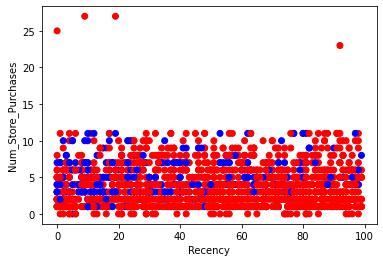

In [502]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(data['Recency'], data['Num_Store_Purchases'], c = data['Response'].map(colordict))
plt.xlabel('Recency')
plt.ylabel('Num_Store_Purchases')

In [503]:
data = data.drop('Recency',axis=1)

To seperate the variables we make a copy of data called cleanData which we will do the cleaning on

In [504]:
cleanData = data #using a copy of data to not harm the original
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1651 non-null   float64
 1   Education              1672 non-null   object 
 2   Status                 1646 non-null   object 
 3   Income                 1609 non-null   float64
 4   Num_of_kids            1672 non-null   float64
 5   Num_of_Teen            1660 non-null   float64
 6   Registration_date      1680 non-null   object 
 7   Mnt_Fruits             1673 non-null   float64
 8   Mnt_Meat               1673 non-null   float64
 9   Mnt_sweet              1659 non-null   float64
 10  Mnt_Wines              1673 non-null   float64
 11  Mnt_Gold_Products      1673 non-null   float64
 12  Mnt_Fish               1673 non-null   float64
 13  Num_Web_Purchases      1651 non-null   float64
 14  Num_Store_Purchases    1673 non-null   float64
 15  Num_

Notice a lot of attributes have less than 1680 in the nonNull count. We need to fill them in with made up, but feassible, data.

Find most common item in attributes and how common it is

Graduation    0.494048
Name: Education, dtype: float64
0.0    0.56369
Name: Num_of_kids, dtype: float64
0.0    0.513095
Name: Num_of_Teen, dtype: float64
2.0    0.020238
Name: Mnt_Fruits, dtype: float64
0.0    0.183929
Name: Mnt_Meat, dtype: float64
0.0    0.172024
Name: Mnt_Wines, dtype: float64
0.0    0.192857
Name: Mnt_Gold_Products, dtype: float64
1.0    0.034524
Name: Mnt_Fish, dtype: float64
2.0    0.1625
Name: Num_Store_Purchases, dtype: float64
0.0    0.271429
Name: Num_Deals_Purchases, dtype: float64
3.0    0.222619
Name: Num_Catalog_Purchases, dtype: float64
14.0    0.167857
Name: Num_Web_Visits, dtype: float64
0.0    0.91369
Name: Response_Campaign_1, dtype: float64
0.0    0.924405
Name: Response_Campaign_2, dtype: float64
0.0    0.92381
Name: Response_Campaign_3, dtype: float64
0.0    0.930952
Name: Response_Campaign_4, dtype: float64
0.0    0.982143
Name: Response_Campaign_5, dtype: float64
0.0    0.986905
Name: Complain, dtype: float64


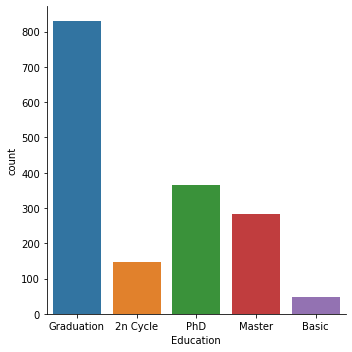

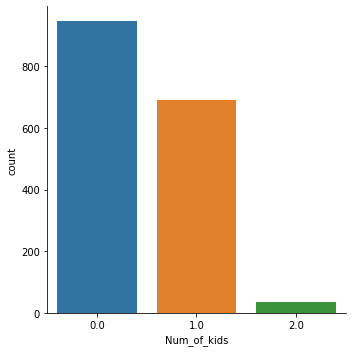

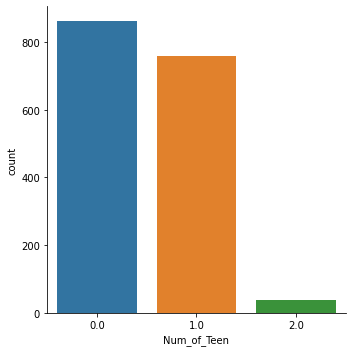

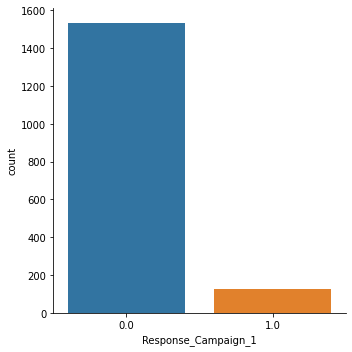

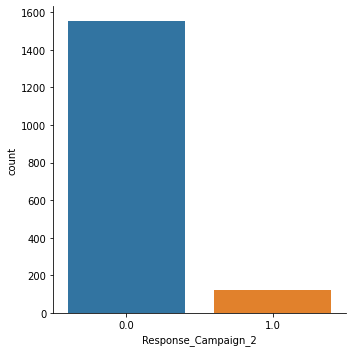

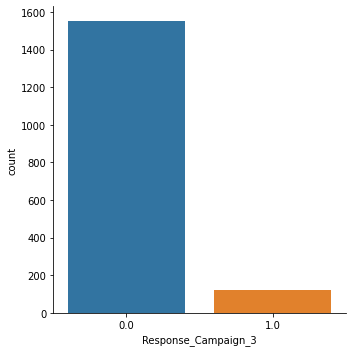

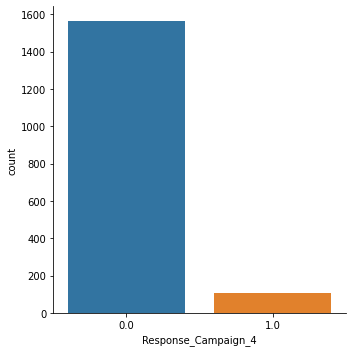

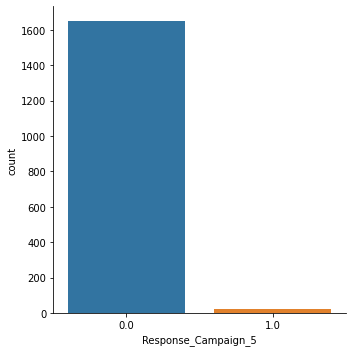

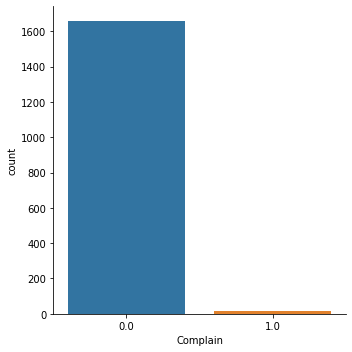

In [505]:
for col in ['Education','Num_of_kids','Num_of_Teen','Mnt_Fruits','Mnt_Meat','Mnt_Wines','Mnt_Gold_Products','Mnt_Fish','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits','Response_Campaign_1','Response_Campaign_2','Response_Campaign_3','Response_Campaign_4','Response_Campaign_5','Complain']:
    if cleanData[col].unique().size<=10: #skip drawing the catplot for the Mnt attributes as it is too messy to learn from
        sns.catplot(x = col, kind = 'count', data = cleanData)
    print(cleanData[col].value_counts()[cleanData[col].mode()]/cleanData.shape[0])

Find if there are rows with too much missing data (Checking for rows that are missing more than half)

In [506]:
cleanData[cleanData.isnull().sum(axis=1)>15]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
1659,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1662,1958.0,Graduation,Together,53977.0,0.0,1.0,08/06/2013,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1663,1971.0,Graduation,Single,55239.0,0.0,1.0,14/07/2013,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1665,1952.0,Graduation,Together,75278.0,0.0,0.0,29/01/2013,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1666,1959.0,Master,Together,82576.0,0.0,0.0,01/08/2012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1673,1975.0,Graduation,Single,33249.0,1.0,0.0,20/02/2013,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1675,1990.0,PhD,Married,74214.0,0.0,0.0,26/08/2012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


We'll drop these 7 rows as it's a small amount and they don't have much data to give

In [507]:
cleanData = cleanData.drop([1659,1662,1663,1665,1666,1673,1675])
cleanData[cleanData.isnull().sum(axis=1)>15]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response


Fill rows missing an attribute with a clear most common with said most common value

In [508]:
for col in ['Response_Campaign_1','Response_Campaign_2','Response_Campaign_3','Response_Campaign_4','Response_Campaign_5','Complain']:
    cleanData[col] = cleanData[col].fillna(cleanData[col].mode()[0])

In [509]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1679
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1644 non-null   float64
 1   Education              1665 non-null   object 
 2   Status                 1639 non-null   object 
 3   Income                 1602 non-null   float64
 4   Num_of_kids            1665 non-null   float64
 5   Num_of_Teen            1653 non-null   float64
 6   Registration_date      1673 non-null   object 
 7   Mnt_Fruits             1673 non-null   float64
 8   Mnt_Meat               1673 non-null   float64
 9   Mnt_sweet              1659 non-null   float64
 10  Mnt_Wines              1673 non-null   float64
 11  Mnt_Gold_Products      1673 non-null   float64
 12  Mnt_Fish               1673 non-null   float64
 13  Num_Web_Purchases      1651 non-null   float64
 14  Num_Store_Purchases    1673 non-null   float64
 15  Num_

Remaining attributes to fix: Income,Num_Web_Purchases, Num_of_Teen, Mnt_Sweet, Num_of_kids, Education, Year_Birth

We'll start with Income becuase it's has the most missing
Like we wrote earlier we're going to normalize Income. possibly remove the outliers

In [510]:
cleanData[cleanData['Income'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
0,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,1.0,1.0,1725.0,...,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,490.0,0.0,184.0,...,4.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0
93,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,738.0,20.0,NaN,...,3.0,10.0,14.0,0.0,1.0,0.0,1.0,0.0,0.0,0
142,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,895.0,10.0,101.0,...,4.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0
297,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,239.0,3.0,141.0,...,1.0,6.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,48.0,58.0,68.0,...,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1562,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,627.0,91.0,597.0,...,5.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1639,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,817.0,183.0,797.0,...,11.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1649,1986.0,Graduation,Single,NaN,1.0,0.0,20/02/2013,5.0,1.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


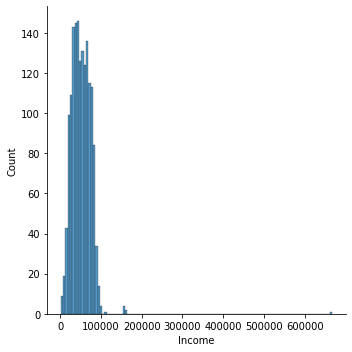

In [511]:
sns.displot(cleanData['Income'])

Finding outliers with values that are too big

In [512]:
dt = cleanData['Income']
data_mean, data_std = np.mean(dt), np.std(dt)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
cleanData.loc[(cleanData['Income'] > upper) | (cleanData['Income'] < lower)]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
4,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,55.0,16.0,1622.0,...,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1973.0,PhD,Married,157243.0,0.0,1.0,01/03/2014,20.0,2.0,1582.0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
276,1977.0,Graduation,Together,666666.0,1.0,0.0,02/06/2013,9.0,14.0,18.0,...,1.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1628,1975.0,Graduation,Divorced,153924.0,0.0,0.0,07/02/2014,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1636,1949.0,PhD,Married,156924.0,0.0,0.0,29/08/2013,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1645,1976.0,PhD,Together,162397.0,1.0,1.0,03/06/2013,85.0,1.0,16.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1646,1977.0,Graduation,Together,157146.0,0.0,0.0,29/04/2013,1.0,0.0,1725.0,...,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Since it's only 7 rows we can remove them

In [513]:
cleanData = cleanData.drop([4,5,276,1628,1636,1645,1646])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
cleanData.loc[(cleanData['Income'] > upper) | (cleanData['Income'] < lower)]


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response


Now we'll change the NaN values. Since there are alot of them and the distribution looks normal we'll use it to fill in the Nan values

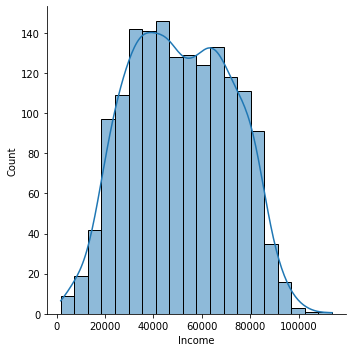

In [514]:
sns.displot(cleanData['Income'], kde=True)

In [515]:
cleanData[cleanData['Income'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
0,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,1.0,1.0,1725.0,...,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,490.0,0.0,184.0,...,4.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0
93,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,738.0,20.0,NaN,...,3.0,10.0,14.0,0.0,1.0,0.0,1.0,0.0,0.0,0
142,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,895.0,10.0,101.0,...,4.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0
297,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,239.0,3.0,141.0,...,1.0,6.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,48.0,58.0,68.0,...,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1562,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,627.0,91.0,597.0,...,5.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1639,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,817.0,183.0,797.0,...,11.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1649,1986.0,Graduation,Single,NaN,1.0,0.0,20/02/2013,5.0,1.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [516]:
mu = cleanData['Income'].mean()
sigma = cleanData['Income'].std()

In [517]:
cleanData[cleanData['Income'].isna()].index

Int64Index([   0,   10,   93,  142,  297,  305,  330,  340,  363,  400,  433,
             434,  438,  441,  443,  463,  475,  495,  500,  502,  509,  521,
             539,  544,  576,  634,  648,  719,  746,  812,  825,  850,  857,
             860,  896,  936,  940,  995,  999, 1001, 1024, 1116, 1118, 1134,
            1151, 1171, 1202, 1221, 1225, 1231, 1234, 1252, 1258, 1262, 1263,
            1299, 1305, 1339, 1342, 1346, 1365, 1392, 1446, 1464, 1496, 1502,
            1540, 1562, 1639, 1649, 1669],
           dtype='int64')

In [518]:
for row in cleanData[cleanData['Income'].isna()].index:
    cleanData['Income'][row] = np.random.normal(mu, sigma)
cleanData[cleanData['Income'].isnull()]

C:\Users\obaro\AppData\Local\Temp\ipykernel_34964\1902711772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['Income'][row] = np.random.normal(mu, sigma)


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response


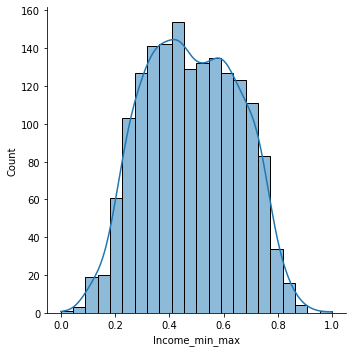

In [519]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(cleanData['Income']))
cleanData['Income_min_max'] = scaler.transform(pd.DataFrame(cleanData['Income']))
sns.displot(cleanData['Income_min_max'],kde=True)

Income Done! starting year of birth

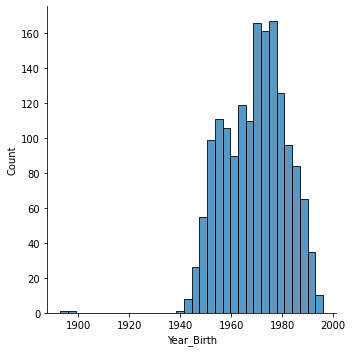

In [520]:
sns.displot(cleanData['Year_Birth'])

notice the outliers, let's see who they are

In [521]:
cleanData[cleanData['Year_Birth']<1940]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max
1184,1899.0,PhD,Together,83532.0,0.0,0.0,26/09/2013,755.0,144.0,562.0,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.749706
1217,1893.0,2n Cycle,Single,60182.0,0.0,1.0,17/05/2014,8.0,0.0,5.0,...,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.556197


There are 2 outliers. Quick claculation between the registration date and their birth year puts them at ages of 123 and 129.
Fun fact according to a quick google search the oldest person ever lived to 122.
Since we believe in not scamming the elderly into buying products we'll leave these people out.


In [522]:
cleanData = cleanData.drop([1184,1217])
cleanData[cleanData['Year_Birth']<1940]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max


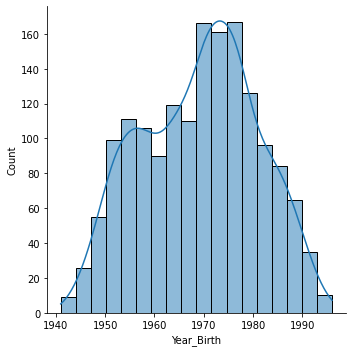

In [523]:
sns.displot(cleanData['Year_Birth'],kde=True)

Now let's look at missing data

In [524]:
cleanData[cleanData['Year_Birth'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max
204,NaN,Graduation,Widow,66731.000000,0.0,1.0,12/09/2012,371.0,159.0,194.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.610471
211,NaN,2n Cycle,Widow,47682.000000,0.0,1.0,15/02/2013,162.0,61.0,83.0,...,8.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.452605
335,NaN,PhD,Widow,62187.000000,0.0,1.0,22/03/2014,512.0,0.0,83.0,...,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.572813
346,NaN,Master,Widow,47570.000000,1.0,1.0,29/05/2013,67.0,1.0,20.0,...,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.451677
465,NaN,Graduation,Widow,27421.000000,0.0,0.0,12/12/2012,43.0,12.0,96.0,...,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.284696
484,NaN,Graduation,Widow,30372.000000,1.0,1.0,25/12/2012,15.0,0.0,12.0,...,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.309152
502,NaN,NaN,NaN,92604.061300,NaN,NaN,13/10/2012,80.0,1.0,37.0,...,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.824889
509,NaN,NaN,NaN,47760.108506,NaN,NaN,21/12/2013,357.0,35.0,271.0,...,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.453253
630,NaN,PhD,Widow,50520.000000,0.0,1.0,28/01/2014,112.0,0.0,6.0,...,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.476125
634,NaN,NaN,NaN,55311.900105,NaN,NaN,15/05/2014,14.0,0.0,6.0,...,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.515837


Since we have a nice distribution after removing the 2 outliers we can fill in the missing data according to the distribution

In [525]:
mu = cleanData['Year_Birth'].mean()
sigma = cleanData['Year_Birth'].std()

In [526]:
cleanData[cleanData['Year_Birth'].isna()].index

Int64Index([ 204,  211,  335,  346,  465,  484,  502,  509,  630,  634,  777,
             838,  840,  933,  936,  945, 1144, 1151, 1153, 1235, 1236, 1358,
            1439, 1464, 1502, 1522, 1564, 1568, 1639],
           dtype='int64')

In [527]:
for row in cleanData[cleanData['Year_Birth'].isna()].index:
    cleanData['Year_Birth'][row] = np.random.normal(mu, sigma)
cleanData[cleanData['Year_Birth'].isnull()]

C:\Users\obaro\AppData\Local\Temp\ipykernel_34964\466152874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['Year_Birth'][row] = np.random.normal(mu, sigma)


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max


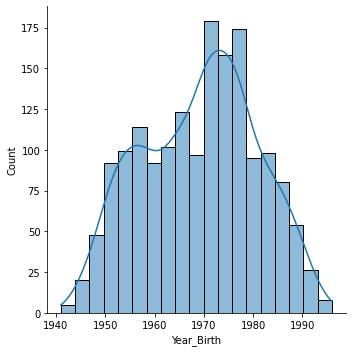

In [528]:
sns.displot(cleanData['Year_Birth'],kde=True)

During other tests we noticed that some year of births aren't whole numbers (Might be due to bugs while working). Let's change that just in case

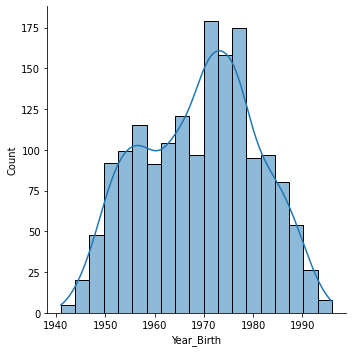

In [529]:
cleanData['Year_Birth'] = cleanData['Year_Birth'].astype(np.int64)
sns.displot(cleanData['Year_Birth'],kde=True)

Year of Birth done! starting status

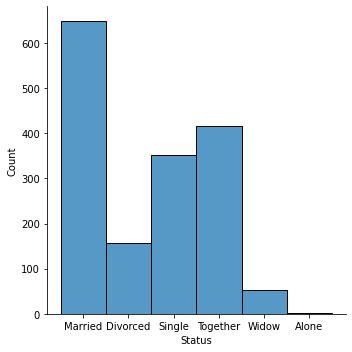

In [530]:
sns.displot(cleanData['Status'])

Alone is the same as single so we merge them

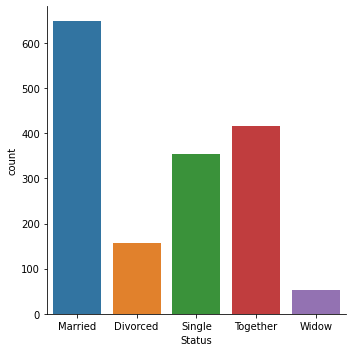

In [531]:

cleanData['Status'] = cleanData['Status'].replace('Alone','Single')
sns.catplot(x = 'Status', kind = 'count', data = cleanData)

34 rows of NaN in Status. That's a lot so we won't drop them

In [532]:
cleanData[cleanData['Status'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max
38,1951,Graduation,NaN,40689.000000,0.0,1.0,18/03/2013,270.0,3.0,27.0,...,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.394652
72,1963,Master,NaN,48721.000000,1.0,1.0,13/05/2013,81.0,18.0,113.0,...,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.461216
124,1973,PhD,NaN,48432.000000,0.0,1.0,18/10/2012,322.0,3.0,50.0,...,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.458821
148,1962,Graduation,NaN,63887.000000,0.0,1.0,08/09/2012,897.0,23.0,207.0,...,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.586901
150,1973,PhD,NaN,48432.000000,0.0,1.0,18/10/2012,322.0,3.0,50.0,...,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.458821
156,1954,Graduation,NaN,64497.000000,0.0,1.0,10/09/2012,1170.0,48.0,320.0,...,9.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.591957
158,1970,PhD,NaN,67353.000000,0.0,1.0,31/12/2013,702.0,17.0,151.0,...,12.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.615625
363,1976,2n Cycle,NaN,61325.762716,1.0,0.0,02/09/2013,6.0,3.0,14.0,...,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.565676
389,1954,PhD,NaN,65324.000000,0.0,1.0,11/01/2014,384.0,0.0,102.0,...,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.598810
390,1978,Graduation,NaN,63693.000000,0.0,1.0,14/10/2013,587.0,43.0,337.0,...,9.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.585294


Convert Status to numerical

In [533]:
cleanData['Status_cat'] = cleanData['Status'].astype('category').cat.codes

Noticed later that Nan were mapped to -1

In [534]:
cleanData.groupby(['Status','Status_cat']).size()

Status    Status_cat
Divorced  0             158
Married   1             649
Single    2             355
Together  3             416
Widow     4              52
dtype: int64

In [535]:
cleanData[cleanData['Status_cat'] == -1]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat
38,1951,Graduation,NaN,40689.000000,0.0,1.0,18/03/2013,270.0,3.0,27.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.394652,-1
72,1963,Master,NaN,48721.000000,1.0,1.0,13/05/2013,81.0,18.0,113.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.461216,-1
124,1973,PhD,NaN,48432.000000,0.0,1.0,18/10/2012,322.0,3.0,50.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.458821,-1
148,1962,Graduation,NaN,63887.000000,0.0,1.0,08/09/2012,897.0,23.0,207.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.586901,-1
150,1973,PhD,NaN,48432.000000,0.0,1.0,18/10/2012,322.0,3.0,50.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.458821,-1
156,1954,Graduation,NaN,64497.000000,0.0,1.0,10/09/2012,1170.0,48.0,320.0,...,16.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.591957,-1
158,1970,PhD,NaN,67353.000000,0.0,1.0,31/12/2013,702.0,17.0,151.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.615625,-1
363,1976,2n Cycle,NaN,61325.762716,1.0,0.0,02/09/2013,6.0,3.0,14.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.565676,-1
389,1954,PhD,NaN,65324.000000,0.0,1.0,11/01/2014,384.0,0.0,102.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.598810,-1
390,1978,Graduation,NaN,63693.000000,0.0,1.0,14/10/2013,587.0,43.0,337.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.585294,-1


Sadly doesn't look like Status has a strong correlation with anything (Largest number is 0.06).
Therefor instead of using correlation to devide we'll change everything to mode

In [536]:
cleanData.loc[cleanData[cleanData['Status_cat'] == -1].index, 'Status_cat'] = cleanData['Status_cat'].mode()[0]

Changing Status according to Status_cat


In [537]:
for row in cleanData[cleanData['Status'].isna()].index:
    stat = cleanData['Status_cat'][row]
    if stat == 0:
        cleanData['Status'][row] = 'Divorced'
    if stat == 1:
        cleanData['Status'][row] = 'Married'
    if stat == 2:
        cleanData['Status'][row] = 'Single'
    if stat == 3:
        cleanData['Status'][row] = 'Together'
    if stat == 4:
        cleanData['Status'][row] = 'Widow'

C:\Users\obaro\AppData\Local\Temp\ipykernel_34964\3659595922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['Status'][row] = 'Married'


1    683
3    416
2    355
0    158
4     52
Name: Status_cat, dtype: int64 
 Married     683
Together    416
Single      355
Divorced    158
Widow        52
Name: Status, dtype: int64


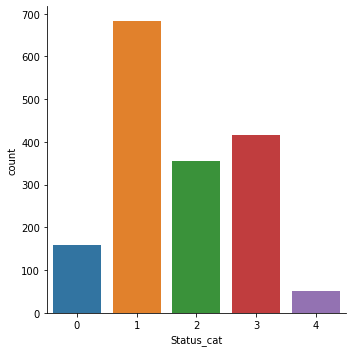

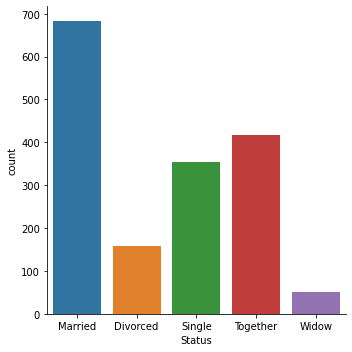

In [538]:
sns.catplot(x = 'Status_cat', kind = 'count', data = cleanData)
sns.catplot(x = 'Status', kind = 'count', data = cleanData)
print(cleanData['Status_cat'].value_counts(),'\n',cleanData['Status'].value_counts())


In [539]:
cleanData[cleanData['Status'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat


Status done! next is Num_Web_Visits

Notice there are people that bought things through website while having 0 website visits

In [540]:
cleanData[cleanData['Num_Web_Visits'] == 0]['Num_Web_Purchases']

16      10.0
26       8.0
27       8.0
57       7.0
230      4.0
604      2.0
671      2.0
823      2.0
916      1.0
926      1.0
938      1.0
979      1.0
983      1.0
992      1.0
1082     1.0
1167     1.0
1214     1.0
1298     1.0
1300     1.0
1316     1.0
1355     1.0
1386     1.0
1457     1.0
1468     1.0
1526     1.0
1534     1.0
1539     1.0
1630     0.0
Name: Num_Web_Purchases, dtype: float64

Since there are a lot of them we'll change their 'Num_Web_Visits' to the average

In [541]:
tmp_index = cleanData[cleanData['Num_Web_Visits'] == 0]['Num_Web_Purchases'].index

In [542]:
for row in tmp_index:
    cleanData.loc[row, 'Num_Web_Visits'] = cleanData['Num_Web_Visits'].median() 

In [543]:
cleanData[cleanData['Num_Web_Visits'] == 0]['Num_Web_Purchases']

Series([], Name: Num_Web_Purchases, dtype: float64)

In [544]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1664 non-null   int64  
 1   Education              1656 non-null   object 
 2   Status                 1664 non-null   object 
 3   Income                 1664 non-null   float64
 4   Num_of_kids            1656 non-null   float64
 5   Num_of_Teen            1644 non-null   float64
 6   Registration_date      1664 non-null   object 
 7   Mnt_Fruits             1664 non-null   float64
 8   Mnt_Meat               1664 non-null   float64
 9   Mnt_sweet              1650 non-null   float64
 10  Mnt_Wines              1664 non-null   float64
 11  Mnt_Gold_Products      1664 non-null   float64
 12  Mnt_Fish               1664 non-null   float64
 13  Num_Web_Purchases      1642 non-null   float64
 14  Num_Store_Purchases    1664 non-null   float64
 15  Num_

Now we deal with Num_Web_Purchases

[15. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0. nan]


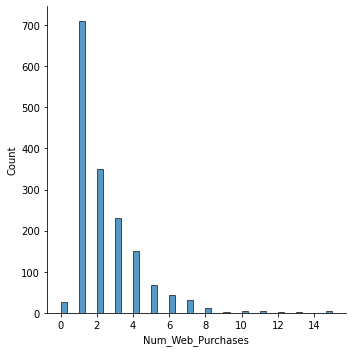

In [545]:
print(cleanData['Num_Web_Purchases'].unique())
sns.displot(cleanData['Num_Web_Purchases'])

There are 22 rows with missing Num_Web_Purchases (matches what we saw in info)

In [546]:
cleanData[cleanData['Num_Web_Purchases'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat
1651,1963,Master,Together,38620.00000,0.0,0.0,11/05/2013,112.0,17.0,44.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.377505,3
1652,1955,Graduation,Married,76998.00000,0.0,1.0,11/01/2013,1449.0,89.0,161.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.695557,1
1653,1973,Master,Married,38961.00000,1.0,0.0,30/12/2013,19.0,7.0,19.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.380331,1
1654,1972,Master,Married,57136.00000,1.0,1.0,09/07/2013,306.0,5.0,109.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.530954,1
1655,1991,Graduation,Single,90273.00000,0.0,0.0,14/12/2013,704.0,129.0,853.0,...,4.0,0.0,1.0,1.0,1.0,0.0,0.0,1,0.805571,2
1656,1946,PhD,Single,62159.00000,0.0,0.0,28/04/2014,182.0,17.0,259.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.572581,2
1657,1969,Master,Married,79734.00000,0.0,0.0,28/06/2014,572.0,8.0,232.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.718231,1
1658,1963,2n Cycle,Married,32632.00000,0.0,0.0,02/08/2012,63.0,151.0,137.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.327881,1
1660,1978,PhD,Together,27683.00000,1.0,0.0,04/08/2012,152.0,9.0,121.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.286867,3
1661,1979,Graduation,Together,75507.00000,0.0,0.0,02/05/2014,709.0,93.0,374.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.683200,3


Looking back at the correlations. Num_Web_Purchases has a high correlation with Num_of_Teen (which doesn't seem to have a clear reason)
and Num_Web_Visits (a more reasonable connection).

The problem is that there are too many options for number of web visits. We need to group them together into categories: (0 - 10, 10-20,20-30,30-40,40+)

In [547]:
cleanData.loc[(cleanData['Num_Web_Visits']  > 0) & (cleanData['Num_Web_Visits'] <= 10), 'Web_Visits_Range'] = 0
cleanData.loc[(cleanData['Num_Web_Visits'] > 10) & (cleanData['Num_Web_Visits'] <= 20), 'Web_Visits_Range'] = 1
cleanData.loc[(cleanData['Num_Web_Visits'] > 20) & (cleanData['Num_Web_Visits'] <= 30), 'Web_Visits_Range'] = 2
cleanData.loc[(cleanData['Num_Web_Visits'] > 30) & (cleanData['Num_Web_Visits'] <= 40), 'Web_Visits_Range'] = 3
cleanData.loc[ cleanData['Num_Web_Visits'] > 40, 'Web_Visits_Range'] = 4

In [548]:
cleanData['Web_Visits_Range'].value_counts()

1.0    893
0.0    763
3.0      6
2.0      2
Name: Web_Visits_Range, dtype: int64

In [549]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1664 non-null   int64  
 1   Education              1656 non-null   object 
 2   Status                 1664 non-null   object 
 3   Income                 1664 non-null   float64
 4   Num_of_kids            1656 non-null   float64
 5   Num_of_Teen            1644 non-null   float64
 6   Registration_date      1664 non-null   object 
 7   Mnt_Fruits             1664 non-null   float64
 8   Mnt_Meat               1664 non-null   float64
 9   Mnt_sweet              1650 non-null   float64
 10  Mnt_Wines              1664 non-null   float64
 11  Mnt_Gold_Products      1664 non-null   float64
 12  Mnt_Fish               1664 non-null   float64
 13  Num_Web_Purchases      1642 non-null   float64
 14  Num_Store_Purchases    1664 non-null   float64
 15  Num_

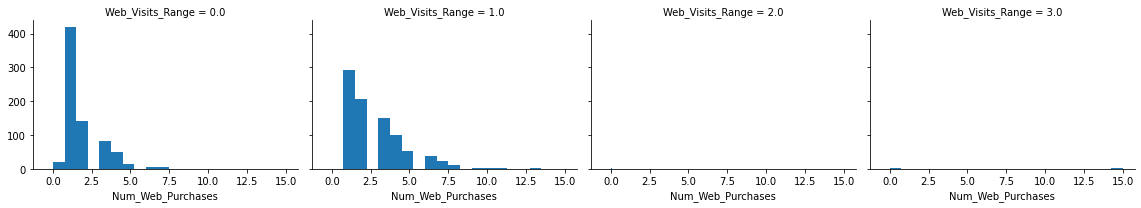

In [550]:
g = sns.FacetGrid(cleanData, col='Web_Visits_Range', height=3, aspect= 1.33)
g.map(plt.hist, 'Num_Web_Purchases', bins=20)

In [551]:
for i in cleanData['Web_Visits_Range'].unique(): 
    cleanData['Num_Web_Purchases'][cleanData['Web_Visits_Range']==i].median()
    print('For range ', i, ' the median is ', cleanData.loc[cleanData['Web_Visits_Range']==i , 'Num_Web_Purchases'].median())
    print('and the number of missing values is ', cleanData.loc[cleanData['Web_Visits_Range']==i , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(cleanData['Web_Visits_Range']==i).sum(), 'rows')

For range  0.0  the median is  1.0
and the number of missing values is  19 out of  763 rows
For range  3.0  the median is  8.0
and the number of missing values is  0 out of  6 rows
For range  1.0  the median is  2.0
and the number of missing values is  3 out of  893 rows
For range  2.0  the median is  0.0
and the number of missing values is  0 out of  2 rows


Since there are only 3 Nan values in the range 10-20 we'll replace them with the median. For range 0-10 there are 19 Nan this is close to 2.5% so we'll generate from similar distribution.

In [552]:
cleanData.loc[cleanData['Web_Visits_Range']==1 , 'Num_Web_Purchases'] = cleanData['Num_Web_Purchases'][cleanData['Web_Visits_Range']==1].fillna(value=cleanData['Num_Web_Purchases'][cleanData['Web_Visits_Range']==1].median())

In [553]:
print('For range 10-20 the median is ', cleanData.loc[cleanData['Web_Visits_Range']==1 , 'Num_Web_Purchases'].median())
print('and the number of missing values is ', cleanData.loc[cleanData['Web_Visits_Range']==1 , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(cleanData['Web_Visits_Range']==1).sum(), 'rows')

For range 10-20 the median is  2.0
and the number of missing values is  0 out of  893 rows


In [554]:
mu = cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].mean()
sigma = cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].std()
print(mu,sigma)

1.8158602150537635 1.4627601858548653


In [555]:
tmp_index = cleanData.loc[cleanData['Web_Visits_Range']==0][cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].isnull()].index
tmp_index

Int64Index([1651, 1655, 1656, 1657, 1658, 1660, 1661, 1664, 1667, 1668, 1669,
            1670, 1671, 1672, 1674, 1676, 1677, 1678, 1679],
           dtype='int64')

In [556]:
for row in tmp_index:
    cleanData.loc[row,'Num_Web_Purchases'] = abs(np.random.normal(mu, sigma))

rounding any non integers

In [557]:
cleanData['Num_Web_Purchases'] = cleanData['Num_Web_Purchases'].apply(np.round)

In [558]:
cleanData[cleanData['Num_Web_Purchases'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range


In [559]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1664 non-null   int64  
 1   Education              1656 non-null   object 
 2   Status                 1664 non-null   object 
 3   Income                 1664 non-null   float64
 4   Num_of_kids            1656 non-null   float64
 5   Num_of_Teen            1644 non-null   float64
 6   Registration_date      1664 non-null   object 
 7   Mnt_Fruits             1664 non-null   float64
 8   Mnt_Meat               1664 non-null   float64
 9   Mnt_sweet              1650 non-null   float64
 10  Mnt_Wines              1664 non-null   float64
 11  Mnt_Gold_Products      1664 non-null   float64
 12  Mnt_Fish               1664 non-null   float64
 13  Num_Web_Purchases      1664 non-null   float64
 14  Num_Store_Purchases    1664 non-null   float64
 15  Num_

Fixing the Web_Visits_Range

In [560]:
for row in cleanData[cleanData['Web_Visits_Range'].isna()].index:
    stat = cleanData['Num_Web_Visits'][row]
    if stat <= 10:
        cleanData['Web_Visits_Range'][row] = 0
    if stat > 10 and stat <= 20:
        cleanData['Web_Visits_Range'][row] = 1
    if stat > 20 and stat <= 30:
        cleanData['Web_Visits_Range'][row] = 2
    if stat > 30 and stat <= 40:
        cleanData['Web_Visits_Range'][row] = 3
    if stat > 40:
        cleanData['Web_Visits_Range'][row] = 4

In [561]:
cleanData[cleanData['Web_Visits_Range'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range


In [562]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1664 non-null   int64  
 1   Education              1656 non-null   object 
 2   Status                 1664 non-null   object 
 3   Income                 1664 non-null   float64
 4   Num_of_kids            1656 non-null   float64
 5   Num_of_Teen            1644 non-null   float64
 6   Registration_date      1664 non-null   object 
 7   Mnt_Fruits             1664 non-null   float64
 8   Mnt_Meat               1664 non-null   float64
 9   Mnt_sweet              1650 non-null   float64
 10  Mnt_Wines              1664 non-null   float64
 11  Mnt_Gold_Products      1664 non-null   float64
 12  Mnt_Fish               1664 non-null   float64
 13  Num_Web_Purchases      1664 non-null   float64
 14  Num_Store_Purchases    1664 non-null   float64
 15  Num_

Num_Web_Purchases is done! next is Mnt_Sweet

In [563]:
cleanData[cleanData['Mnt_sweet'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range
93,1970,Graduation,Single,82626.98576,1.0,2.0,23/08/2013,738.0,20.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0.742206,2,1.0
263,1964,Graduation,Single,18701.00000,1.0,1.0,04/06/2013,12.0,4.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.212430,2,0.0
306,1984,Master,Married,42207.00000,1.0,0.0,01/04/2013,116.0,11.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0.407232,1,1.0
391,1973,Graduation,Married,52845.00000,1.0,0.0,13/08/2013,384.0,25.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.495393,1,1.0
555,1975,Master,Married,7500.00000,1.0,0.0,02/10/2013,3.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.119604,1,0.0
620,1971,Graduation,Single,72258.00000,0.0,1.0,12/09/2013,522.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.656275,2,0.0
681,1972,Master,Divorced,42618.00000,1.0,0.0,09/10/2013,76.0,14.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.410638,0,1.0
820,1967,PhD,Married,77766.00000,0.0,1.0,22/02/2013,1004.0,59.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0.701921,1,1.0
950,1983,Graduation,Married,30096.00000,1.0,0.0,22/05/2014,5.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.306864,1,1.0
1295,1983,Graduation,Married,76630.00000,0.0,NaN,14/01/2014,255.0,31.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.692507,1,0.0


14 columns out of 1664 is 0.8%
let's look at the distribution and see if filling them with median or mode makes sense

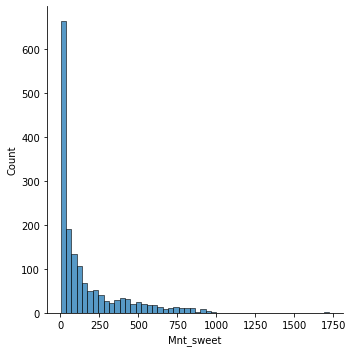

In [564]:
sns.displot(cleanData['Mnt_sweet'])

First thing we see an outlier

In [565]:
cleanData[cleanData['Mnt_sweet']>950]['Mnt_sweet']

0       1725.0
929      951.0
1288     968.0
1367     951.0
1533     961.0
1574     984.0
Name: Mnt_sweet, dtype: float64

Since it's only 1 person we'll remove him

In [566]:
cleanData = cleanData.drop(0)

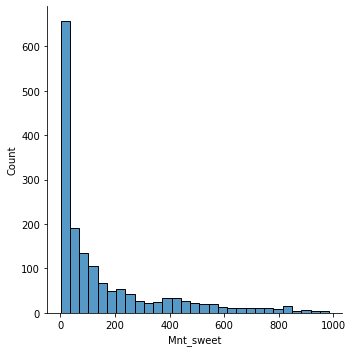

In [567]:
cleanData['Mnt_sweet'] = cleanData['Mnt_sweet'].apply(np.floor) #just in case cause stuff happened while working
sns.displot(cleanData['Mnt_sweet'])

In [568]:
cleanData[cleanData['Mnt_sweet'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range
93,1970,Graduation,Single,82626.98576,1.0,2.0,23/08/2013,738.0,20.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0.742206,2,1.0
263,1964,Graduation,Single,18701.00000,1.0,1.0,04/06/2013,12.0,4.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.212430,2,0.0
306,1984,Master,Married,42207.00000,1.0,0.0,01/04/2013,116.0,11.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0.407232,1,1.0
391,1973,Graduation,Married,52845.00000,1.0,0.0,13/08/2013,384.0,25.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.495393,1,1.0
555,1975,Master,Married,7500.00000,1.0,0.0,02/10/2013,3.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.119604,1,0.0
620,1971,Graduation,Single,72258.00000,0.0,1.0,12/09/2013,522.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.656275,2,0.0
681,1972,Master,Divorced,42618.00000,1.0,0.0,09/10/2013,76.0,14.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.410638,0,1.0
820,1967,PhD,Married,77766.00000,0.0,1.0,22/02/2013,1004.0,59.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0.701921,1,1.0
950,1983,Graduation,Married,30096.00000,1.0,0.0,22/05/2014,5.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.306864,1,1.0
1295,1983,Graduation,Married,76630.00000,0.0,NaN,14/01/2014,255.0,31.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.692507,1,0.0


There are 14 rows with NaN in Mnt_sweet value. since 14/1663 is less than 1% and the possible range is large we'll input the median

In [569]:
cleanData['Mnt_sweet'] = cleanData['Mnt_sweet'].fillna(cleanData['Mnt_sweet'].median())
cleanData[cleanData['Mnt_sweet'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range


Mnt_sweet done! next is Num_of_Teen

In [570]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 1 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1663 non-null   int64  
 1   Education              1655 non-null   object 
 2   Status                 1663 non-null   object 
 3   Income                 1663 non-null   float64
 4   Num_of_kids            1655 non-null   float64
 5   Num_of_Teen            1643 non-null   float64
 6   Registration_date      1663 non-null   object 
 7   Mnt_Fruits             1663 non-null   float64
 8   Mnt_Meat               1663 non-null   float64
 9   Mnt_sweet              1663 non-null   float64
 10  Mnt_Wines              1663 non-null   float64
 11  Mnt_Gold_Products      1663 non-null   float64
 12  Mnt_Fish               1663 non-null   float64
 13  Num_Web_Purchases      1663 non-null   float64
 14  Num_Store_Purchases    1663 non-null   float64
 15  Num_

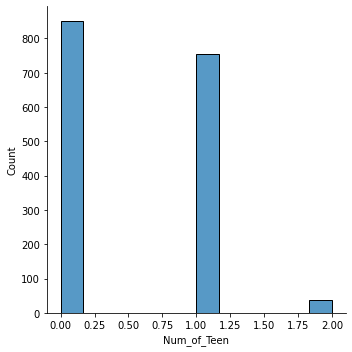

In [571]:
sns.displot(cleanData['Num_of_Teen'])

In [572]:
cleanData['Num_of_Teen'].value_counts()

0.0    851
1.0    754
2.0     38
Name: Num_of_Teen, dtype: int64

We'll look for NaN

In [573]:
cleanData[cleanData['Num_of_Teen'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range
45,1977,Graduation,Married,41124.000000,1.0,NaN,31/10/2012,281.0,7.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.398257,1,1.0
81,1988,2n Cycle,Single,23331.000000,1.0,NaN,05/10/2012,104.0,20.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.250800,2,1.0
408,1964,Graduation,Divorced,51983.000000,0.0,NaN,31/08/2012,631.0,0.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.488249,0,1.0
502,1981,NaN,Married,92604.061300,NaN,NaN,13/10/2012,80.0,1.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.824889,1,1.0
509,1952,NaN,Married,47760.108506,NaN,NaN,21/12/2013,357.0,35.0,271.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.453253,1,0.0
634,1977,NaN,Married,55311.900105,NaN,NaN,15/05/2014,14.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.515837,1,0.0
679,1972,Graduation,Divorced,26759.000000,1.0,NaN,07/02/2014,25.0,3.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.279209,0,1.0
826,1985,Graduation,Together,29103.000000,1.0,NaN,27/08/2012,16.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.298635,3,1.0
888,1950,Graduation,Together,27203.000000,1.0,NaN,06/08/2012,13.0,2.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.282889,3,1.0
936,1971,NaN,Married,68487.101080,NaN,NaN,22/12/2012,741.0,68.0,689.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.625024,1,0.0


From the previous value counts we can see that roughly 50% is 0 and 1 so we'll give 10 of them 1 and the other 10 0

In [574]:
cleanData.loc[[45,81,408,502,509,634,679,826,888,936],'Num_of_Teen'] = 0

In [575]:
cleanData['Num_of_Teen'] = cleanData['Num_of_Teen'].fillna(1)

In [576]:
cleanData[cleanData['Num_of_Teen'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range


Num_of_Teen done!

In [577]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 1 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1663 non-null   int64  
 1   Education              1655 non-null   object 
 2   Status                 1663 non-null   object 
 3   Income                 1663 non-null   float64
 4   Num_of_kids            1655 non-null   float64
 5   Num_of_Teen            1663 non-null   float64
 6   Registration_date      1663 non-null   object 
 7   Mnt_Fruits             1663 non-null   float64
 8   Mnt_Meat               1663 non-null   float64
 9   Mnt_sweet              1663 non-null   float64
 10  Mnt_Wines              1663 non-null   float64
 11  Mnt_Gold_Products      1663 non-null   float64
 12  Mnt_Fish               1663 non-null   float64
 13  Num_Web_Purchases      1663 non-null   float64
 14  Num_Store_Purchases    1663 non-null   float64
 15  Num_

In [578]:
cleanData[cleanData['Education'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range
502,1981,NaN,Married,92604.061300,NaN,0.0,13/10/2012,80.0,1.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.824889,1,1.0
509,1952,NaN,Married,47760.108506,NaN,0.0,21/12/2013,357.0,35.0,271.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.453253,1,0.0
634,1977,NaN,Married,55311.900105,NaN,0.0,15/05/2014,14.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.515837,1,0.0
936,1971,NaN,Married,68487.101080,NaN,0.0,22/12/2012,741.0,68.0,689.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.625024,1,0.0
1151,1976,NaN,Married,44257.130449,NaN,1.0,31/12/2012,12.0,4.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.424222,1,1.0
1464,1980,NaN,Married,34781.175963,NaN,1.0,12/03/2013,9.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.345692,1,1.0
1502,1980,NaN,Married,48619.756442,NaN,1.0,19/06/2013,21.0,8.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.460377,1,1.0
1639,1957,NaN,Married,64680.890727,NaN,1.0,12/12/2012,817.0,183.0,797.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,0.593481,1,0.0


Notice that they're all married. Let's look at the most common Education for married people

In [579]:
tempdata = cleanData
tempdata['Education'][tempdata['Status']=='Married'].value_counts()

Graduation    322
PhD           157
Master        114
2n Cycle       61
Basic          20
Name: Education, dtype: int64

['PhD' 'Master' 'Graduation' '2n Cycle' 'Basic']


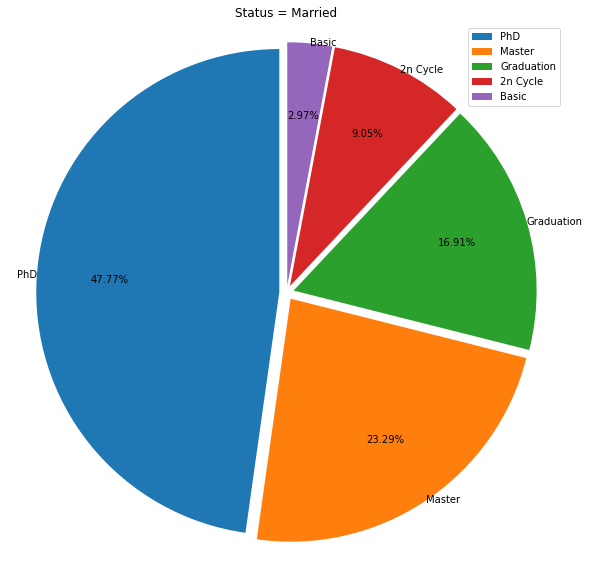

In [580]:
tempdata = tempdata.drop(tempdata[tempdata['Education'].isnull()].index,axis=0)
target = tempdata['Education'][tempdata['Status']=='Married'].unique()
print(target)
fig1,ax1 = plt.subplots(1,figsize=(10,10))
ax1.pie(tempdata['Education'][tempdata['Status']=='Married'].value_counts(), labels=target, labeldistance=1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03])
ax1.axis('equal') 
ax1.set_title('Status = Married')
fig1.set_facecolor('white')
ax1.legend()
plt.show()

Notice ~50% have PHD so we'll give the NaN a PHD. Since there are only 8 it shouldn't have a strong affect

In [581]:
cleanData['Education'] =  cleanData['Education'].fillna('PhD')

In [582]:
cleanData[cleanData['Education'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range


Making a numerical education attribute

In [583]:
cleanData['Edu_cat'] = cleanData['Education'].astype('category').cat.codes

In [584]:
cleanData.groupby(['Education','Edu_cat']).size()

Education   Edu_cat
2n Cycle    0          146
Basic       1           47
Graduation  2          821
Master      3          281
PhD         4          368
dtype: int64

Education is done! lastly Num_of_kids

In [585]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 1 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1663 non-null   int64  
 1   Education              1663 non-null   object 
 2   Status                 1663 non-null   object 
 3   Income                 1663 non-null   float64
 4   Num_of_kids            1655 non-null   float64
 5   Num_of_Teen            1663 non-null   float64
 6   Registration_date      1663 non-null   object 
 7   Mnt_Fruits             1663 non-null   float64
 8   Mnt_Meat               1663 non-null   float64
 9   Mnt_sweet              1663 non-null   float64
 10  Mnt_Wines              1663 non-null   float64
 11  Mnt_Gold_Products      1663 non-null   float64
 12  Mnt_Fish               1663 non-null   float64
 13  Num_Web_Purchases      1663 non-null   float64
 14  Num_Store_Purchases    1663 non-null   float64
 15  Num_

0.0    935
1.0    685
2.0     35
Name: Num_of_kids, dtype: int64


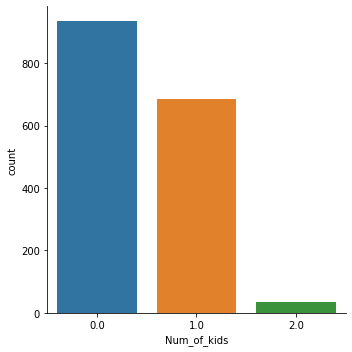

In [586]:
print(cleanData['Num_of_kids'].value_counts())
sns.catplot(x='Num_of_kids', kind='count', data=cleanData)

In [587]:
cleanData[cleanData['Num_of_kids'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range,Edu_cat
502,1981,PhD,Married,92604.061300,NaN,0.0,13/10/2012,80.0,1.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0,0.824889,1,1.0,4
509,1952,PhD,Married,47760.108506,NaN,0.0,21/12/2013,357.0,35.0,271.0,...,0.0,0.0,0.0,0.0,0.0,0,0.453253,1,0.0,4
634,1977,PhD,Married,55311.900105,NaN,0.0,15/05/2014,14.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0,0.515837,1,0.0,4
936,1971,PhD,Married,68487.101080,NaN,0.0,22/12/2012,741.0,68.0,689.0,...,0.0,0.0,0.0,0.0,0.0,0,0.625024,1,0.0,4
1151,1976,PhD,Married,44257.130449,NaN,1.0,31/12/2012,12.0,4.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0,0.424222,1,1.0,4
1464,1980,PhD,Married,34781.175963,NaN,1.0,12/03/2013,9.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0,0.345692,1,1.0,4
1502,1980,PhD,Married,48619.756442,NaN,1.0,19/06/2013,21.0,8.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0,0.460377,1,1.0,4
1639,1957,PhD,Married,64680.890727,NaN,1.0,12/12/2012,817.0,183.0,797.0,...,0.0,1.0,1.0,0.0,0.0,1,0.593481,1,0.0,4


These are the same from the Education section. let's see how many kids do married people have:
Looks close for 0 and 1. since we're dealing with only 8 people which is roughly 0.5% of the data we'll simply use the mode

In [588]:
cleanData['Num_of_kids'][cleanData['Status']=='Married'].value_counts()

0.0    376
1.0    286
2.0     12
Name: Num_of_kids, dtype: int64

In [589]:
cleanData['Num_of_kids'] = cleanData['Num_of_kids'].fillna(0)
cleanData[cleanData['Num_of_kids'].isna()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range,Edu_cat


In [590]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 1 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1663 non-null   int64  
 1   Education              1663 non-null   object 
 2   Status                 1663 non-null   object 
 3   Income                 1663 non-null   float64
 4   Num_of_kids            1663 non-null   float64
 5   Num_of_Teen            1663 non-null   float64
 6   Registration_date      1663 non-null   object 
 7   Mnt_Fruits             1663 non-null   float64
 8   Mnt_Meat               1663 non-null   float64
 9   Mnt_sweet              1663 non-null   float64
 10  Mnt_Wines              1663 non-null   float64
 11  Mnt_Gold_Products      1663 non-null   float64
 12  Mnt_Fish               1663 non-null   float64
 13  Num_Web_Purchases      1663 non-null   float64
 14  Num_Store_Purchases    1663 non-null   float64
 15  Num_

Main cleaning done! Now we'll look for any more outliers. Need to decide how many to remove based on mail from TA that I'll hopefuly get later

In [591]:
clean_numeric_col = cleanData.describe().columns # to get the numeric column
print(clean_numeric_col)

Index(['Year_Birth', 'Income', 'Num_of_kids', 'Num_of_Teen', 'Mnt_Fruits',
       'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish',
       'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases',
       'Num_Catalog_Purchases', 'Num_Web_Visits', 'Response_Campaign_1',
       'Response_Campaign_2', 'Response_Campaign_3', 'Response_Campaign_4',
       'Response_Campaign_5', 'Complain', 'Response', 'Income_min_max',
       'Status_cat', 'Web_Visits_Range', 'Edu_cat'],
      dtype='object')


In [592]:
clean_numeric_col = cleanData.describe().columns # to get the numeric column
clean_numeric_data = cleanData[clean_numeric_col] #getting the numeric columns
clean_numeric_data.info() #checking we got the numeric columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 1 to 1679
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1663 non-null   int64  
 1   Income                 1663 non-null   float64
 2   Num_of_kids            1663 non-null   float64
 3   Num_of_Teen            1663 non-null   float64
 4   Mnt_Fruits             1663 non-null   float64
 5   Mnt_Meat               1663 non-null   float64
 6   Mnt_sweet              1663 non-null   float64
 7   Mnt_Wines              1663 non-null   float64
 8   Mnt_Gold_Products      1663 non-null   float64
 9   Mnt_Fish               1663 non-null   float64
 10  Num_Web_Purchases      1663 non-null   float64
 11  Num_Store_Purchases    1663 non-null   float64
 12  Num_Deals_Purchases    1663 non-null   float64
 13  Num_Catalog_Purchases  1663 non-null   float64
 14  Num_Web_Visits         1663 non-null   float64
 15  Resp

d:\Documents\University\Year_4\2nd Semester\Data mining\datamine\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


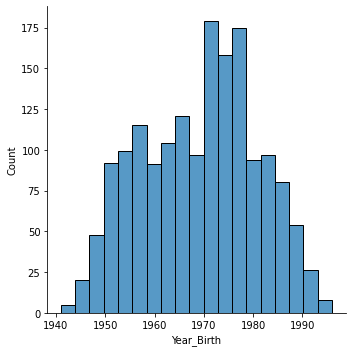

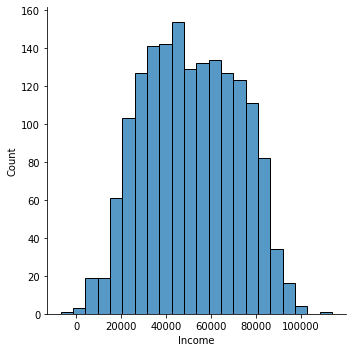

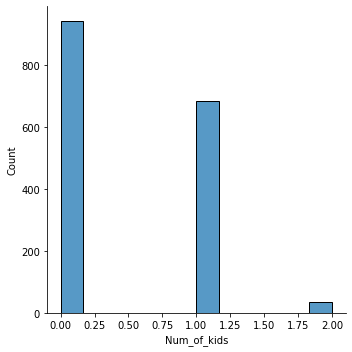

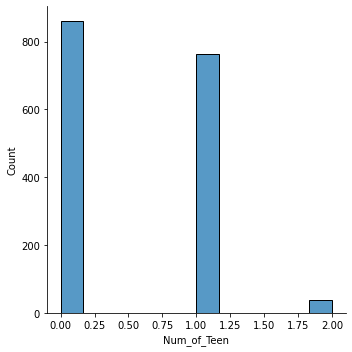

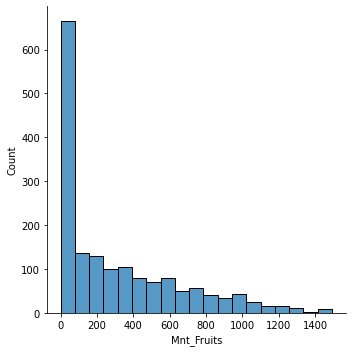

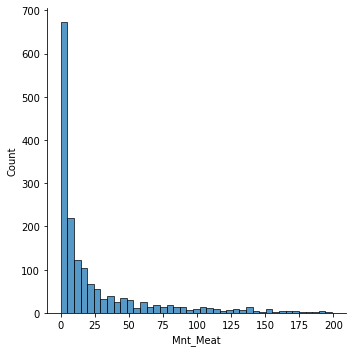

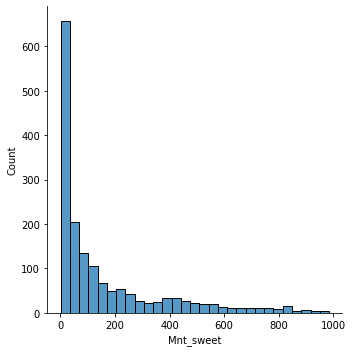

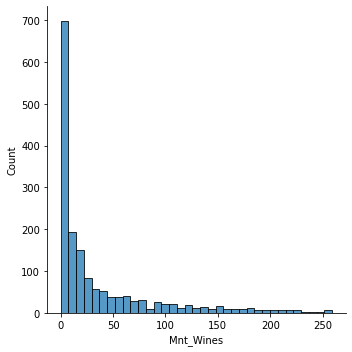

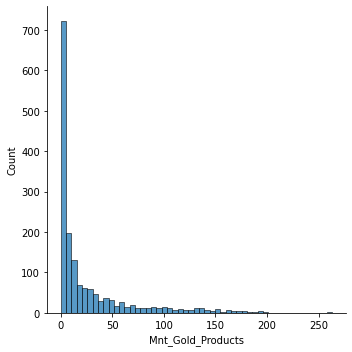

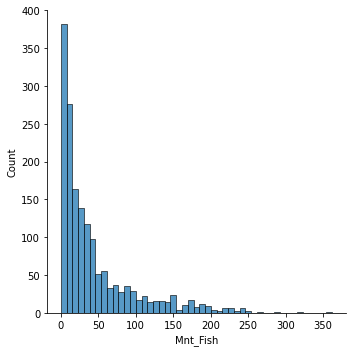

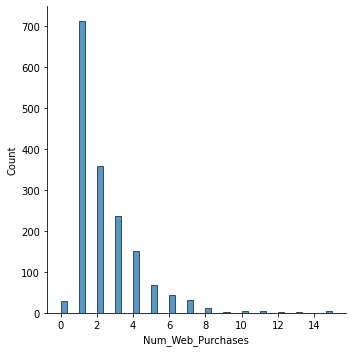

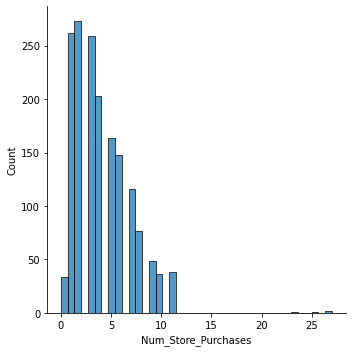

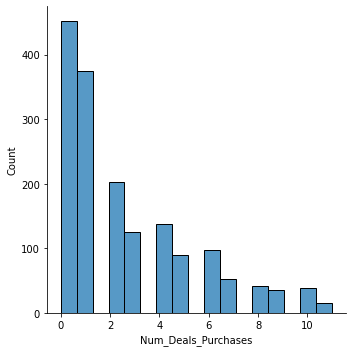

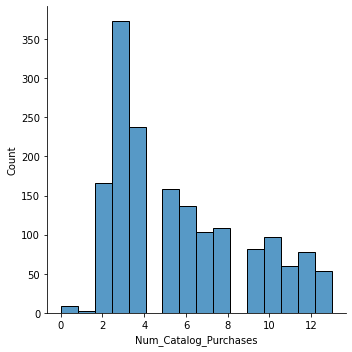

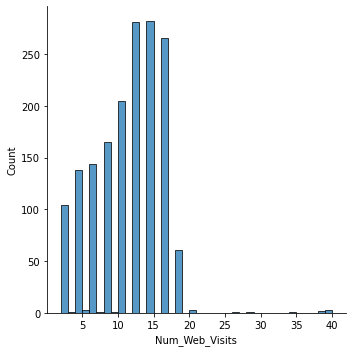

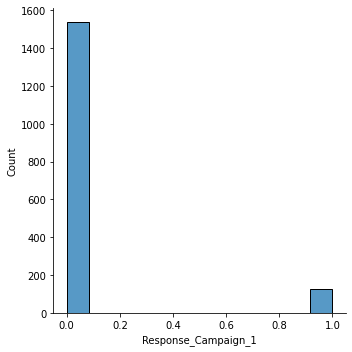

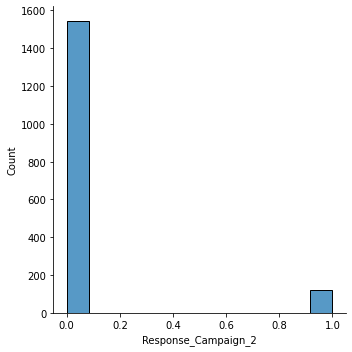

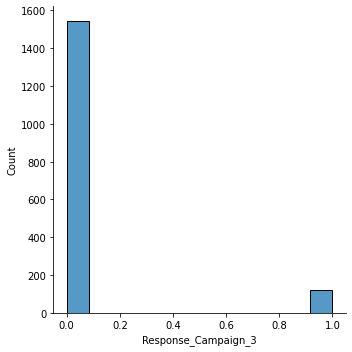

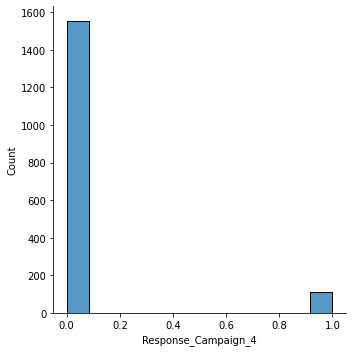

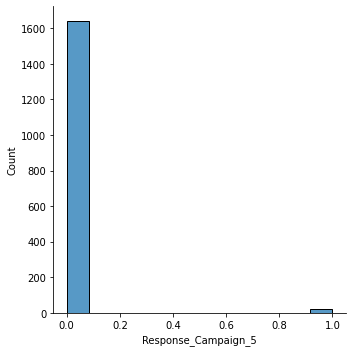

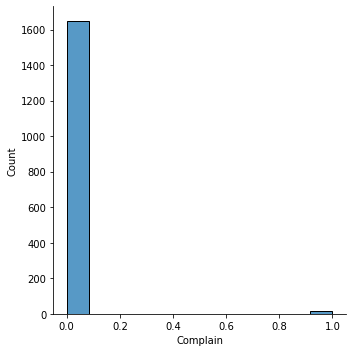

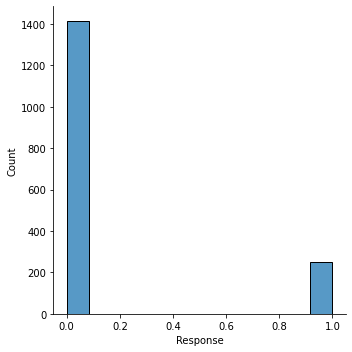

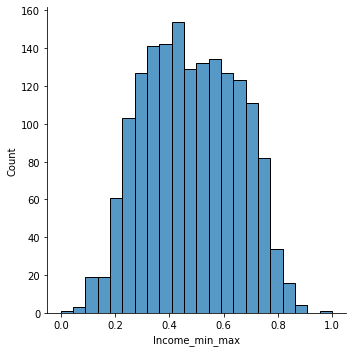

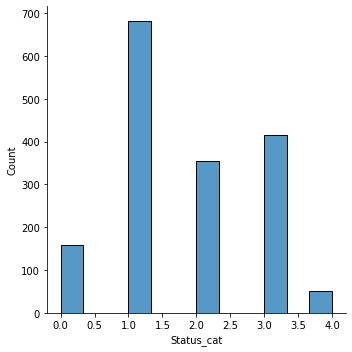

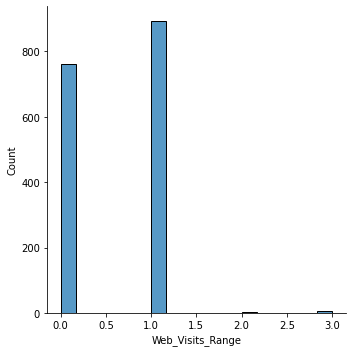

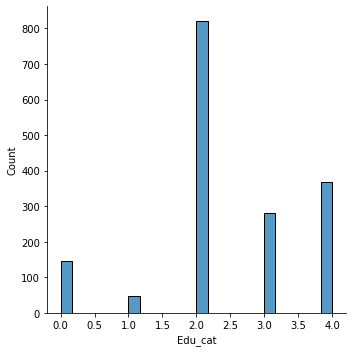

In [593]:
for row in clean_numeric_col:
    sns.displot(cleanData[row])

In [594]:
clean_numeric_col

Index(['Year_Birth', 'Income', 'Num_of_kids', 'Num_of_Teen', 'Mnt_Fruits',
       'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish',
       'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases',
       'Num_Catalog_Purchases', 'Num_Web_Visits', 'Response_Campaign_1',
       'Response_Campaign_2', 'Response_Campaign_3', 'Response_Campaign_4',
       'Response_Campaign_5', 'Complain', 'Response', 'Income_min_max',
       'Status_cat', 'Web_Visits_Range', 'Edu_cat'],
      dtype='object')

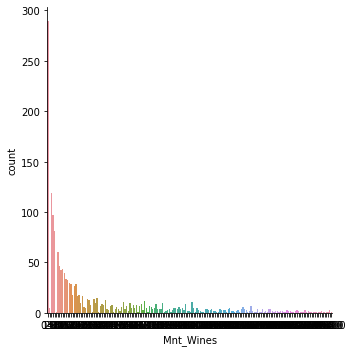

In [595]:
sns.catplot(x='Mnt_Wines', kind='count', data=cleanData)

In [596]:
cleanData['Mnt_Meat'].value_counts().sort_index()

0.0      307
1.0      126
2.0       79
3.0       88
4.0       72
        ... 
185.0      1
190.0      1
193.0      1
194.0      3
199.0      1
Name: Mnt_Meat, Length: 148, dtype: int64

Adding columns for interesting data

Age

In [598]:
cleanData['Age'] = 2022 - cleanData['Year_Birth']
cleanData = cleanData.drop('Year_Birth', axis=1)


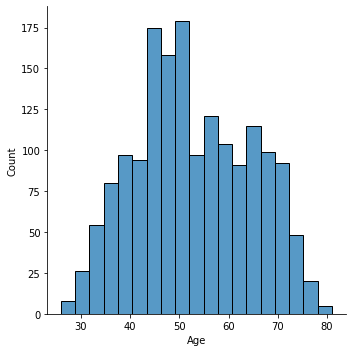

In [599]:
sns.displot(cleanData['Age'])

Since we have big numbers we'll use discretization

In [600]:
print(cleanData['Age'].min(),cleanData['Age'].max())

26 81


In [601]:
cleanData.loc[ cleanData['Age'] <= 30, 'Age_bin'] = 0
cleanData.loc[(cleanData['Age'] > 30) & (cleanData['Age'] <= 50), 'Age_bin'] = 1
cleanData.loc[(cleanData['Age'] > 50) & (cleanData['Age'] <= 70), 'Age_bin'] = 2
cleanData.loc[ cleanData['Age'] > 70, 'Age_bin'] = 3

In [602]:
cleanData['Age_bin'].value_counts().sort_index()

0.0     22
1.0    730
2.0    785
3.0    126
Name: Age_bin, dtype: int64

Amount of campaigns responded

In [603]:
cleanData['Mnt_Responded'] = cleanData['Response_Campaign_1'] + cleanData['Response_Campaign_2'] + cleanData['Response_Campaign_3'] + cleanData['Response_Campaign_4'] + cleanData['Response_Campaign_5']

In [604]:
cleanData['Mnt_Responded'].value_counts()

0.0    1318
1.0     240
2.0      64
3.0      33
4.0       8
Name: Mnt_Responded, dtype: int64

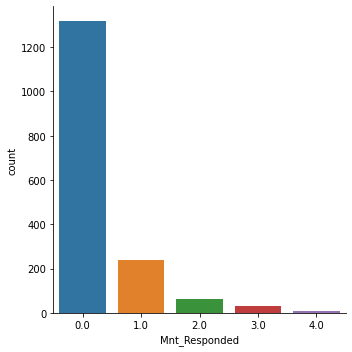

In [605]:
sns.catplot(x='Mnt_Responded', kind='count', data=cleanData)

Notice that the group with the most responces also mostly responded to target attribute. Inaddition most are graduates with 0 kids, above avg income and don't visit the web often.

In [606]:
cleanData[cleanData['Mnt_Responded'] == 4]

,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Response_Campaign_5,Complain,Response,Income_min_max,Status_cat,Web_Visits_Range,Edu_cat,Age,Age_bin,Mnt_Responded
943,Graduation,Married,83512.0,0.0,0.0,17/06/2014,1060.0,61.0,835.0,80.0,...,1.0,0.0,1,0.749540,1,0.0,2,36,1.0,4.0
1080,Graduation,Together,87771.0,0.0,1.0,22/05/2013,1492.0,38.0,287.0,50.0,...,1.0,0.0,1,0.784836,3,1.0,2,63,2.0,4.0
1302,Graduation,Divorced,102692.0,0.0,0.0,05/04/2013,168.0,148.0,444.0,32.0,...,1.0,0.0,1,0.908491,0,0.0,2,48,1.0,4.0
1314,Graduation,Married,65169.0,0.0,0.0,14/01/2014,1074.0,0.0,64.0,0.0,...,1.0,0.0,1,0.597526,1,1.0,2,40,1.0,4.0
1338,Graduation,Together,87771.0,0.0,1.0,22/05/2013,1492.0,38.0,287.0,50.0,...,1.0,0.0,1,0.784836,3,1.0,2,63,2.0,4.0
1386,Graduation,Together,80134.0,0.0,0.0,14/02/2014,966.0,26.0,282.0,52.0,...,1.0,0.0,0,0.721546,3,1.0,2,28,0.0,4.0
1613,PhD,Single,84865.0,0.0,0.0,09/05/2013,1248.0,16.0,349.0,43.0,...,1.0,0.0,1,0.760753,2,0.0,4,61,2.0,4.0
1633,Graduation,Single,91249.0,0.0,0.0,20/10/2012,1324.0,27.0,119.0,71.0,...,1.0,0.0,1,0.813659,2,0.0,2,66,2.0,4.0


Mnt_Spent on products in the last 2 years

In [607]:
cleanData['Mnt_Spent'] = cleanData['Mnt_Fish'] + cleanData['Mnt_Fruits'] + cleanData['Mnt_Gold_Products'] + cleanData['Mnt_Meat'] + cleanData['Mnt_sweet'] + cleanData['Mnt_Wines']

Need to normalize it

In [608]:
scaler.fit(pd.DataFrame(cleanData['Mnt_Spent']))
cleanData['Spent_min_max'] = scaler.transform(pd.DataFrame(cleanData['Mnt_Spent']))
cleanData[['Mnt_Spent','Spent_min_max']].head()

,Mnt_Spent,Spent_min_max
1,8.0,0.001190
2,178.0,0.068651
3,1082.0,0.427381
6,9.0,0.001587
7,859.0,0.338889


Num_of_Children

In [609]:
cleanData['Num_of_Children'] = cleanData['Num_of_kids'] + cleanData['Num_of_Teen']

Num_Purchases in last month

In [610]:
cleanData['Num_Purchases'] = cleanData['Num_Web_Purchases'] + cleanData['Num_Store_Purchases'] + cleanData['Num_Catalog_Purchases']

In [611]:
cleanData['Num_Purchases'].max()

33.0

Since 33 is relatively large we'll use discretization again

In [612]:
A = cleanData['Num_Purchases'].min()
B = cleanData['Num_Purchases'].max()
N = 4
W = np.round((B - A)/N)
W

8.0

In [613]:
cleanData.loc[ cleanData['Num_Purchases'] <= W, 'Purchase_bin'] = 0
cleanData.loc[(cleanData['Num_Purchases'] > W) & (cleanData['Num_Purchases'] <= 2*W), 'Purchase_bin'] = 1
cleanData.loc[(cleanData['Num_Purchases'] > 2*W) & (cleanData['Num_Purchases'] <= 3*W), 'Purchase_bin'] = 2
cleanData.loc[ cleanData['Num_Purchases'] > 3*W, 'Purchase_bin'] = 3

In [614]:
cleanData['Purchase_bin'].value_counts().sort_index()

0.0    532
1.0    707
2.0    388
3.0     36
Name: Purchase_bin, dtype: int64

Looking for possible issue

In [615]:
cleanData[cleanData['Num_Deals_Purchases'] > cleanData['Num_Purchases']]['Num_Deals_Purchases']
tmp_index = cleanData[cleanData['Num_Deals_Purchases'] > cleanData['Num_Purchases']]['Num_Deals_Purchases'].index
list(tmp_index)

[1053, 1254, 1280, 1316, 1340, 1378, 1572, 1639]

Since there are people who have more purchases with discount than purchases in general we need to fix this. Becuase it's only 8 people we'll remove them

In [616]:
cleanData = cleanData.drop(list(tmp_index))

In [617]:
cleanData[cleanData['Num_Deals_Purchases'] > cleanData['Num_Purchases']]['Num_Deals_Purchases']

Series([], Name: Num_Deals_Purchases, dtype: float64)

Registration Date Bins

In [618]:
cleanData['Registration_date']

1       18/05/2014
2       18/09/2012
3       23/01/2013
6       23/06/2014
7       08/01/2013
           ...    
1674    29/12/2013
1676    06/03/2013
1677    20/07/2013
1678    21/03/2014
1679    21/01/2014
Name: Registration_date, Length: 1655, dtype: object

Begin by making attribute for year and month

In [619]:
datedf = cleanData['Registration_date'].str.extract('(?P<Day>\d\d/)(?P<Month>\d\d/)(?P<Year>\d\d\d\d)', expand = True)
datedf['Day'] = datedf['Day'].str.extract('(\d+)').astype(np.int64)
datedf['Month'] = datedf['Month'].str.extract('(\d+)').astype(np.int64)
datedf['Year'] = datedf['Year'].astype(np.int64)
datedf

,Day,Month,Year
1,18,5,2014
2,18,9,2012
3,23,1,2013
6,23,6,2014
7,8,1,2013
...,...,...,...
1674,29,12,2013
1676,6,3,2013
1677,20,7,2013
1678,21,3,2014


In [620]:
cleanData['Registration_month'] = datedf['Month']
cleanData['Registration_year'] = datedf['Year']

In [621]:
cleanData['Registration_year'].max()

2014

Divide into half year segments

In [622]:
cleanData.loc[(cleanData['Registration_year'] == 2012) & (cleanData['Registration_month'] <= 6), 'Registration_bin'] = 0
cleanData.loc[(cleanData['Registration_year'] == 2012) & (cleanData['Registration_month'] > 6), 'Registration_bin'] = 1
cleanData.loc[(cleanData['Registration_year'] == 2013) & (cleanData['Registration_month'] <= 6), 'Registration_bin'] = 2
cleanData.loc[(cleanData['Registration_year'] == 2013) & (cleanData['Registration_month'] > 6), 'Registration_bin'] = 3
cleanData.loc[(cleanData['Registration_year'] == 2014) & (cleanData['Registration_month'] <= 6), 'Registration_bin'] = 4
cleanData.loc[(cleanData['Registration_year'] == 2014) & (cleanData['Registration_month'] > 6), 'Registration_bin'] = 5

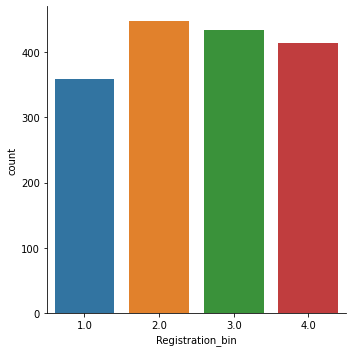

In [623]:
sns.catplot(x='Registration_bin', kind='count', data=cleanData)

Graphs

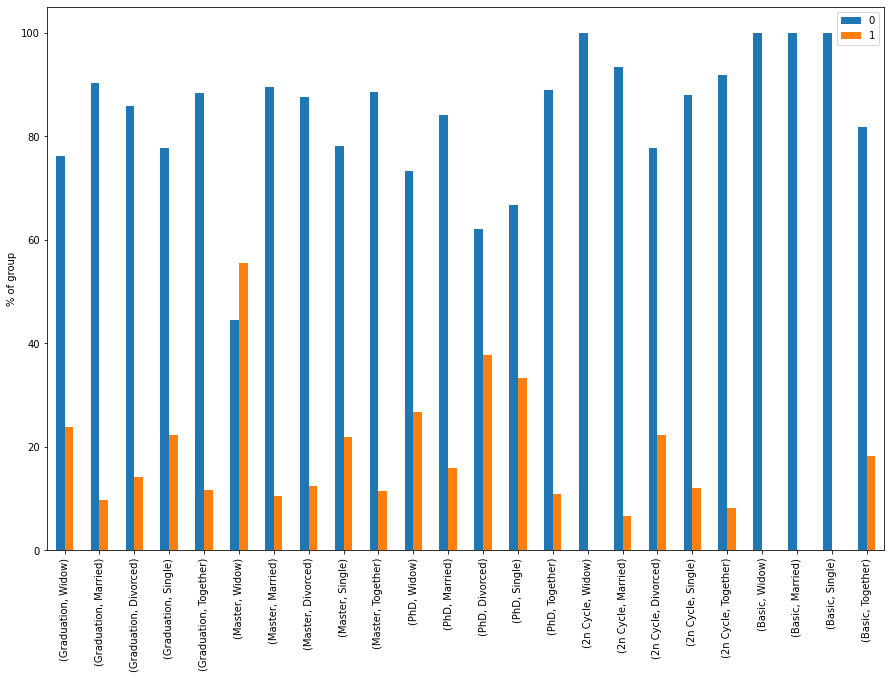

In [624]:
labelSet1 = cleanData['Education'][cleanData['Response']==True].unique()
labelSet2 = cleanData['Status'][cleanData['Response']==True].unique()

responsePrecentage = {}
for i,label1 in enumerate(labelSet1):
    for j,label2 in enumerate(labelSet2):
        responsePrecentage[(label1,label2)] = cleanData['Response'][cleanData['Education']==label1][cleanData['Status']==label2].value_counts(normalize=True)*100
plot = pd.DataFrame.from_dict(responsePrecentage,orient='index').plot(kind='bar',figsize=(15,10),ylabel='% of group') #show how many there are


The group with the highest response rate are widows with master degress

Status distribution based on response

['Widow' 'Married' 'Divorced' 'Single' 'Together']


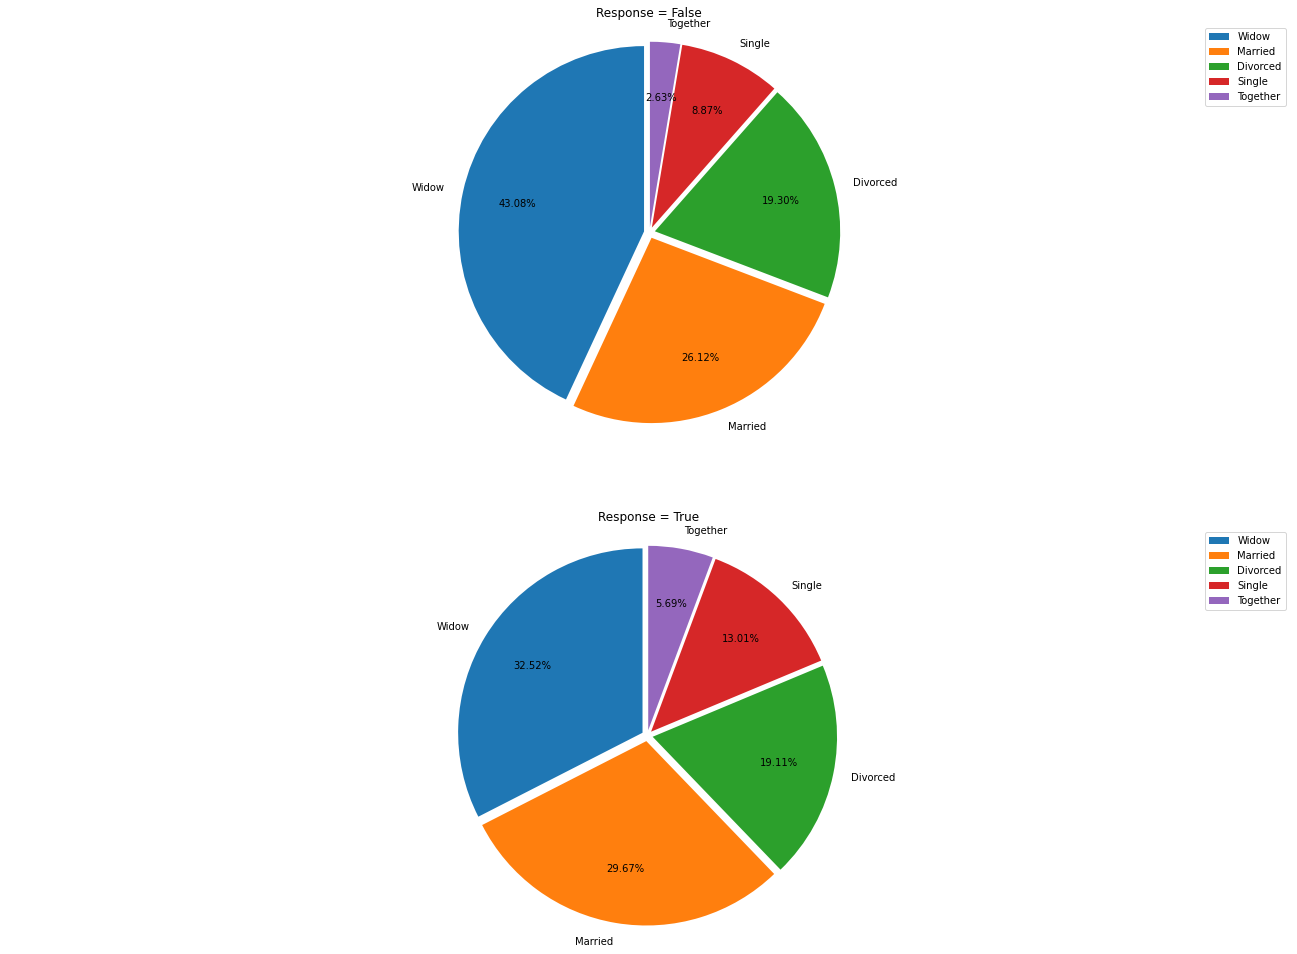

In [625]:
target = cleanData['Status'][cleanData['Response']==True].unique()
print(target)
fig1,(ax1,ax2) = plt.subplots(2,1,figsize=(23,17))
ax1.pie(cleanData['Status'][cleanData['Response']==False].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03])
ax1.axis('equal') 
ax1.set_title('Response = False')
fig1.set_facecolor('white')
target = cleanData['Status'][cleanData['Response']==True].unique()
ax2.pie(cleanData['Status'][cleanData['Response']==True].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03])
ax2.axis('equal')
ax2.set_title('Response = True')
ax1.legend()
ax2.legend()
plt.show()

Response to campaign 3 in compared to response. Most in 1 are blue

Text(0, 0.5, 'Response_Campaign_3')

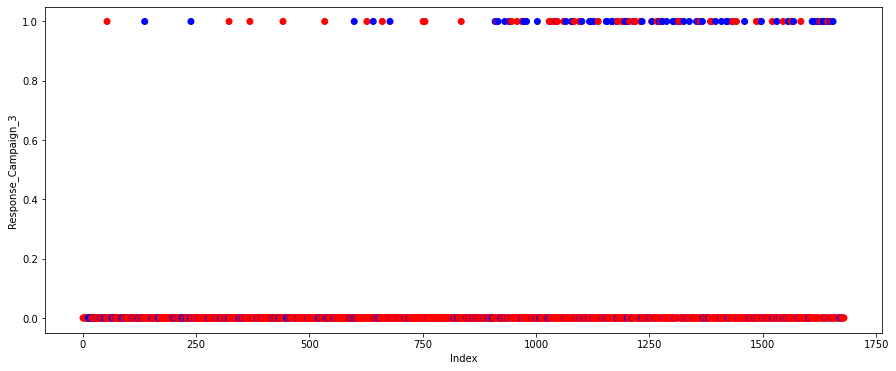

In [636]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(cleanData.index, cleanData['Response_Campaign_3'], c = cleanData['Response'].map(colordict))
plt.xlabel("Index")
plt.ylabel("Response_Campaign_3")

Because we saw a correlation between web purchases and visits we'll make it into a graph

In [647]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 1 to 1679
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              1655 non-null   object 
 1   Status                 1655 non-null   object 
 2   Income                 1655 non-null   float64
 3   Num_of_kids            1655 non-null   float64
 4   Num_of_Teen            1655 non-null   float64
 5   Registration_date      1655 non-null   object 
 6   Mnt_Fruits             1655 non-null   float64
 7   Mnt_Meat               1655 non-null   float64
 8   Mnt_sweet              1655 non-null   float64
 9   Mnt_Wines              1655 non-null   float64
 10  Mnt_Gold_Products      1655 non-null   float64
 11  Mnt_Fish               1655 non-null   float64
 12  Num_Web_Purchases      1655 non-null   float64
 13  Num_Store_Purchases    1655 non-null   float64
 14  Num_Deals_Purchases    1655 non-null   float64
 15  Num_

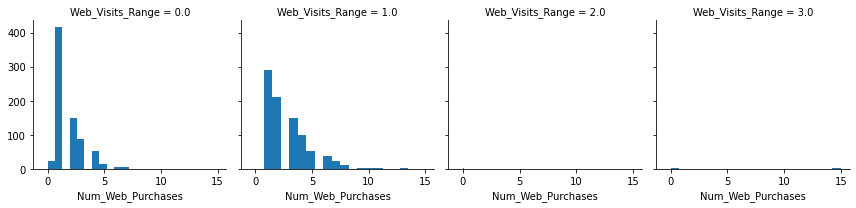

In [639]:
g = sns.FacetGrid(cleanData, col='Web_Visits_Range')
g.map(plt.hist, 'Num_Web_Purchases', bins=20)

In [627]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 1 to 1679
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              1655 non-null   object 
 1   Status                 1655 non-null   object 
 2   Income                 1655 non-null   float64
 3   Num_of_kids            1655 non-null   float64
 4   Num_of_Teen            1655 non-null   float64
 5   Registration_date      1655 non-null   object 
 6   Mnt_Fruits             1655 non-null   float64
 7   Mnt_Meat               1655 non-null   float64
 8   Mnt_sweet              1655 non-null   float64
 9   Mnt_Wines              1655 non-null   float64
 10  Mnt_Gold_Products      1655 non-null   float64
 11  Mnt_Fish               1655 non-null   float64
 12  Num_Web_Purchases      1655 non-null   float64
 13  Num_Store_Purchases    1655 non-null   float64
 14  Num_Deals_Purchases    1655 non-null   float64
 15  Num_

In [628]:
df1 = cleanData[['Response','Complain','Income_min_max','Num_of_Children','Purchase_bin','Spent_min_max','Mnt_Responded','Web_Visits_Range','Status_cat','Edu_cat','Age_bin','Registration_bin']]
df1.head()

,Response,Complain,Income_min_max,Num_of_Children,Purchase_bin,Spent_min_max,Mnt_Responded,Web_Visits_Range,Status_cat,Edu_cat,Age_bin,Registration_bin
1,0,0.0,0.071786,0.0,1.0,0.001190,0.0,3.0,0,2,2.0,4.0
2,0,0.0,0.123979,0.0,1.0,0.068651,0.0,3.0,2,2,1.0,1.0
3,0,0.0,0.615261,2.0,3.0,0.427381,0.0,1.0,3,0,2.0,2.0
6,0,0.0,0.090789,2.0,1.0,0.001587,0.0,3.0,1,4,2.0,4.0
7,0,0.0,0.479257,2.0,3.0,0.338889,0.0,0.0,3,3,2.0,2.0


In [629]:
df1.shape

(1655, 12)

In [630]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='Response')
df2 = pd.DataFrame(pca.transform(df1))

In [631]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.093166,1.407028,-1.594783,0.185927,-0.080391,-0.224532,0.093682,2.822771,0.050461,-0.065670,-0.007322,0.099144
1,1.345915,-1.234928,-0.041281,-0.735231,-0.946334,-0.024650,-0.614860,2.229896,0.265324,-0.025039,-0.003258,0.041564
2,2.275278,-0.385141,1.213392,0.295112,2.483721,-0.020222,-0.504064,0.430316,-0.060437,0.130638,-0.026498,0.003832
3,-1.986579,0.696217,-0.745900,-1.261056,0.720424,0.682358,-0.394342,2.221896,0.062388,0.106389,-0.010166,0.153993
4,-0.476169,-1.437428,1.191009,0.172593,1.903884,-0.252317,-0.658318,-0.456863,0.018370,-0.209454,-0.024107,0.104874


In [632]:
pca.explained_variance_ratio_

array([0.21813364, 0.20457087, 0.17766522, 0.13072764, 0.08940554,
       0.06483941, 0.05909879, 0.03365443, 0.01531961, 0.00409343,
       0.00146706, 0.00102437])

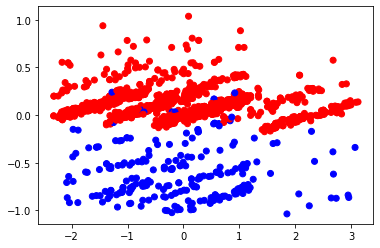

In [646]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[8], c = cleanData['Response'].map(colordict))

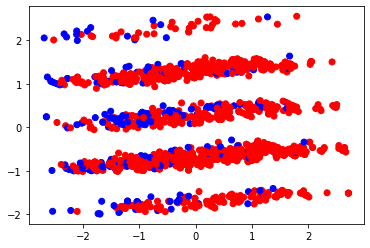

In [634]:
plt.scatter(df2[1], df2[2], c = cleanData['Response'].map(colordict))

In [635]:
df1.to_csv('Marketing_Campaign_final.csv')